In [210]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from src.vae_mi import *
from src.vae import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [211]:
train_dataset = np.load("./datasets/FireEvac_train_set.npy")
test_dataset = np.load("./datasets/FireEvac_test_set.npy")

max_train_dataset = np.max(train_dataset, axis=0)
min_train_dataset = np.min(train_dataset, axis=0)
max_test_dataset = np.max(test_dataset, axis=0)
min_test_dataset = np.min(test_dataset, axis=0)


In [212]:
range_train_dataset = max_train_dataset - min_train_dataset
range_test_dataset = max_test_dataset - min_test_dataset
# range [0,1]
train_dataset = (train_dataset / range_train_dataset).astype('float32')
test_dataset = (test_dataset / range_test_dataset).astype('float32')

# range [-1,1]
# train_dataset = ((2 / range_train_dataset) * (train_dataset - min_train_dataset) - 1).astype('float32')
# test_dataset = ((2 / range_test_dataset) * (test_dataset - min_test_dataset) - 1).astype('float32')


In [213]:
test_size = len(test_dataset)
train_size = len(train_dataset)

In [220]:
batch_size = 1000
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=test_size, shuffle=True)

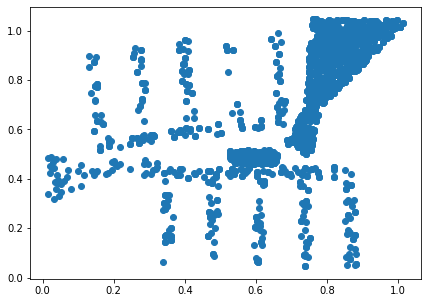

In [221]:
plot_fire_evac_dataset(train_dataset)

In [222]:
max_epochs = 4000
show_step = 100
input_size = 2
output_size = 2
latent_dim = 32
en_hidden = 256
de_hidden = 256
gendata_size = 1000
vae = VAE(en_hidden, latent_dim, de_hidden, input_size, output_size)
opt = torch.optim.Adam(vae.parameters(), lr=1e-5)
loss_train = []
loss_test = []
loss_epoch = 0

In [234]:
# remove comment to reload model if model already exists
# vae.load_state_dict(torch.load("./train.checkpoint"))

<All keys matched successfully>

Epoch 0
loss = 0.004374625626951456
original distribution


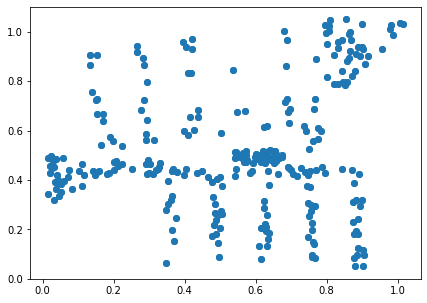

plot reconstruction distribution


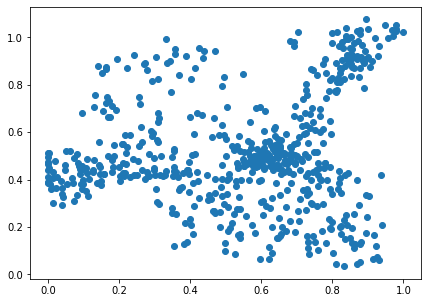

generate synthetic data


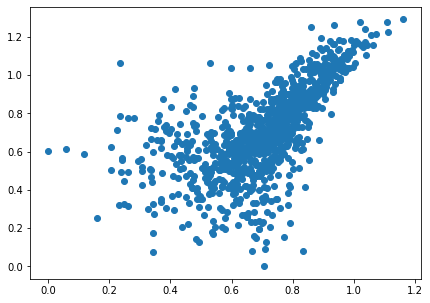

Epoch 1
loss = 0.004395718686282635
Epoch 2
loss = 0.004381824284791946
Epoch 3
loss = 0.004400338511914015
Epoch 4
loss = 0.004362986423075199
Epoch 5
loss = 0.004373936448246241
Epoch 6
loss = 0.0043858252465724945
Epoch 7
loss = 0.0043421522714197636
Epoch 8
loss = 0.004387080203741789
Epoch 9
loss = 0.004383237101137638
Epoch 10
loss = 0.004372420720756054
Epoch 11
loss = 0.004378665704280138
Epoch 12
loss = 0.0043656304478645325
Epoch 13
loss = 0.004408752545714378
Epoch 14
loss = 0.004393726121634245
Epoch 15
loss = 0.0043512387201189995
Epoch 16
loss = 0.004357653204351664
Epoch 17
loss = 0.00436690729111433
Epoch 18
loss = 0.0043726409785449505
Epoch 19
loss = 0.004357890225946903
Epoch 20
loss = 0.004340978804975748
Epoch 21
loss = 0.004425074439495802
Epoch 22
loss = 0.004371658433228731
Epoch 23
loss = 0.004396362695842981
Epoch 24
loss = 0.004353825934231281
Epoch 25
loss = 0.0043815309181809425
Epoch 26
loss = 0.004381879232823849
Epoch 27
loss = 0.004374531097710133
Epoch

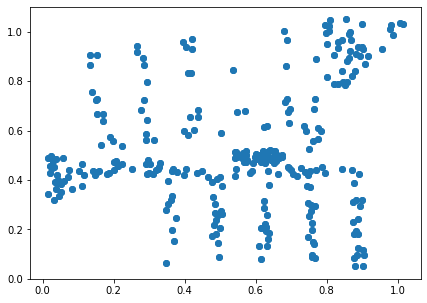

plot reconstruction distribution


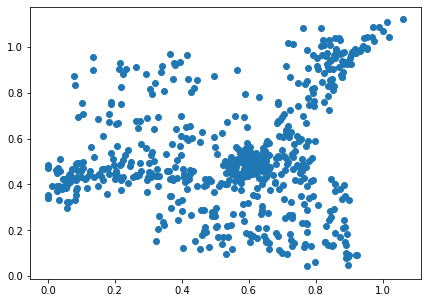

generate synthetic data


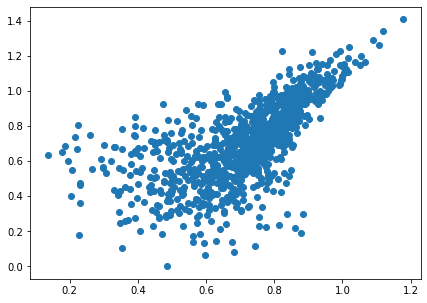

Epoch 101
loss = 0.004366937559098005
Epoch 102
loss = 0.0043984996154904366
Epoch 103
loss = 0.004398471675813198
Epoch 104
loss = 0.004383002407848835
Epoch 105
loss = 0.00432376004755497
Epoch 106
loss = 0.004369255155324936
Epoch 107
loss = 0.004382415674626827
Epoch 108
loss = 0.004379383288323879
Epoch 109
loss = 0.0043740482069551945
Epoch 110
loss = 0.004381759092211723
Epoch 111
loss = 0.004360170569270849
Epoch 112
loss = 0.004380811471492052
Epoch 113
loss = 0.004353742115199566
Epoch 114
loss = 0.004390236455947161
Epoch 115
loss = 0.004398840479552746
Epoch 116
loss = 0.004408282693475485
Epoch 117
loss = 0.004395201802253723
Epoch 118
loss = 0.00439412472769618
Epoch 119
loss = 0.004380508325994015
Epoch 120
loss = 0.004364024847745895
Epoch 121
loss = 0.004384659696370363
Epoch 122
loss = 0.004368339665234089
Epoch 123
loss = 0.0043748472817242146
Epoch 124
loss = 0.004366473760455847
Epoch 125
loss = 0.004388775676488876
Epoch 126
loss = 0.004354332108050585
Epoch 127
l

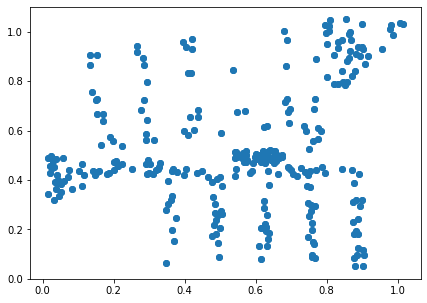

plot reconstruction distribution


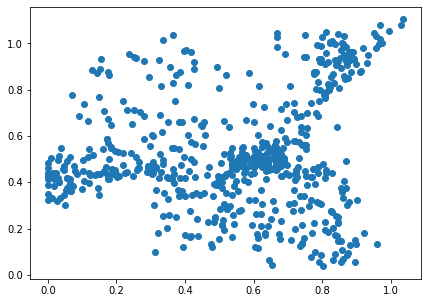

generate synthetic data


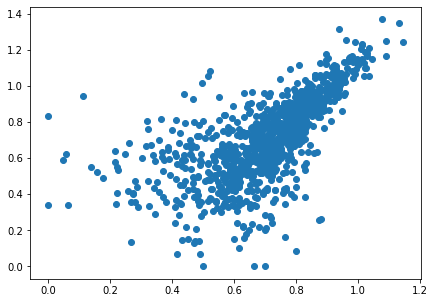

Epoch 201
loss = 0.0043820603750646114
Epoch 202
loss = 0.004376080818474293
Epoch 203
loss = 0.004363589454442263
Epoch 204
loss = 0.004383567720651627
Epoch 205
loss = 0.004362845327705145
Epoch 206
loss = 0.004370293114334345
Epoch 207
loss = 0.004383556544780731
Epoch 208
loss = 0.004367877263575792
Epoch 209
loss = 0.004340556915849447
Epoch 210
loss = 0.004366076085716486
Epoch 211
loss = 0.004381977953016758
Epoch 212
loss = 0.004342647735029459
Epoch 213
loss = 0.004344596061855555
Epoch 214
loss = 0.00439275661483407
Epoch 215
loss = 0.004365297965705395
Epoch 216
loss = 0.004352043382823467
Epoch 217
loss = 0.004357173107564449
Epoch 218
loss = 0.004326976370066404
Epoch 219
loss = 0.004324629902839661
Epoch 220
loss = 0.004344093147665262
Epoch 221
loss = 0.004378220997750759
Epoch 222
loss = 0.004322048742324114
Epoch 223
loss = 0.0043375431559979916
Epoch 224
loss = 0.00434970622882247
Epoch 225
loss = 0.004386376589536667
Epoch 226
loss = 0.004306258633732796
Epoch 227
lo

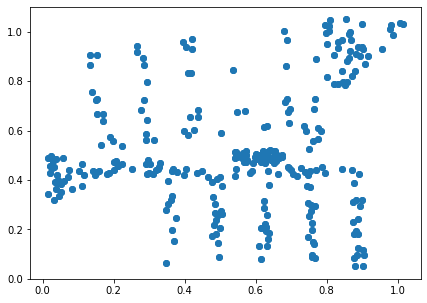

plot reconstruction distribution


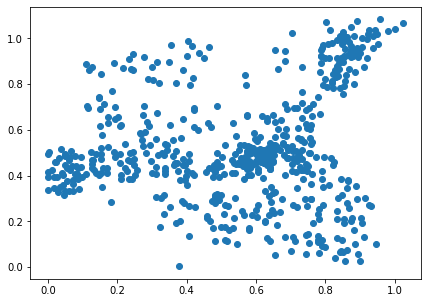

generate synthetic data


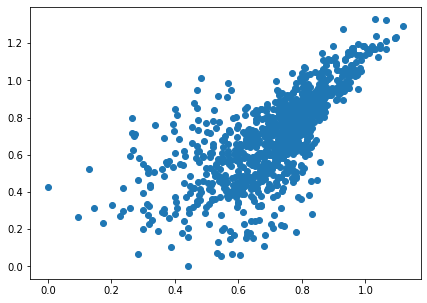

Epoch 301
loss = 0.004369198810309172
Epoch 302
loss = 0.004317257087677717
Epoch 303
loss = 0.0043313028290867805
Epoch 304
loss = 0.004414085298776627
Epoch 305
loss = 0.004401430021971464
Epoch 306
loss = 0.004356838762760162
Epoch 307
loss = 0.004370721988379955
Epoch 308
loss = 0.0043177530169487
Epoch 309
loss = 0.004351758863776922
Epoch 310
loss = 0.004390567075461149
Epoch 311
loss = 0.004346985369920731
Epoch 312
loss = 0.004396355245262384
Epoch 313
loss = 0.004376780707389116
Epoch 314
loss = 0.00433466536924243
Epoch 315
loss = 0.0043615540489554405
Epoch 316
loss = 0.00435210345312953
Epoch 317
loss = 0.004356802441179752
Epoch 318
loss = 0.004346191417425871
Epoch 319
loss = 0.0043944744393229485
Epoch 320
loss = 0.0043584262020885944
Epoch 321
loss = 0.0043251090683043
Epoch 322
loss = 0.00430351821705699
Epoch 323
loss = 0.004345486871898174
Epoch 324
loss = 0.00437015388160944
Epoch 325
loss = 0.00434978399425745
Epoch 326
loss = 0.00436449097469449
Epoch 327
loss = 0

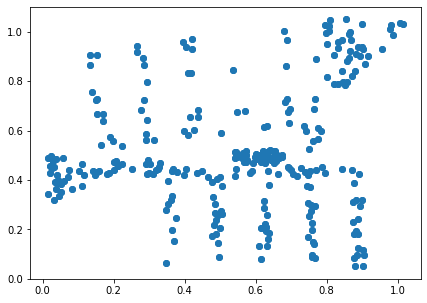

plot reconstruction distribution


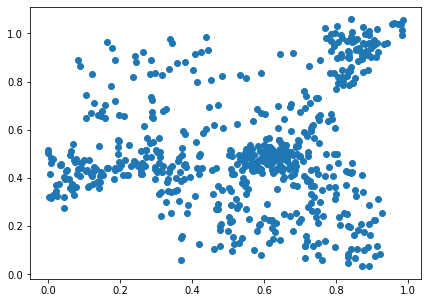

generate synthetic data


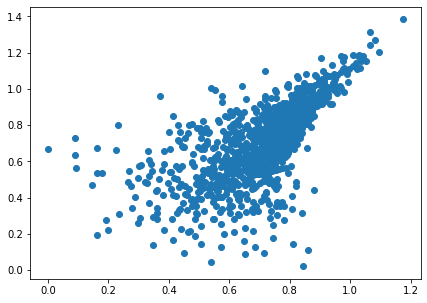

Epoch 401
loss = 0.004318404011428356
Epoch 402
loss = 0.004383204970508814
Epoch 403
loss = 0.004362406209111214
Epoch 404
loss = 0.0043554422445595264
Epoch 405
loss = 0.004329474177211523
Epoch 406
loss = 0.004326848313212395
Epoch 407
loss = 0.004353067371994257
Epoch 408
loss = 0.004344173241406679
Epoch 409
loss = 0.0043245600536465645
Epoch 410
loss = 0.004338147584348917
Epoch 411
loss = 0.004313873592764139
Epoch 412
loss = 0.004349174909293652
Epoch 413
loss = 0.004315000027418137
Epoch 414
loss = 0.004365269560366869
Epoch 415
loss = 0.004362025763839483
Epoch 416
loss = 0.00438234768807888
Epoch 417
loss = 0.004347959067672491
Epoch 418
loss = 0.004411607515066862
Epoch 419
loss = 0.004328303039073944
Epoch 420
loss = 0.004351401701569557
Epoch 421
loss = 0.00434072082862258
Epoch 422
loss = 0.0043693785555660725
Epoch 423
loss = 0.004362952429801226
Epoch 424
loss = 0.0043341126292943954
Epoch 425
loss = 0.00435433117672801
Epoch 426
loss = 0.0043305810540914536
Epoch 427


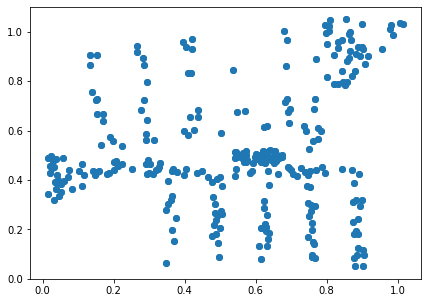

plot reconstruction distribution


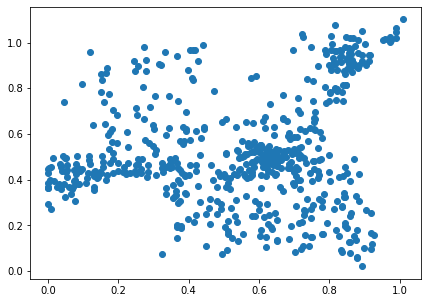

generate synthetic data


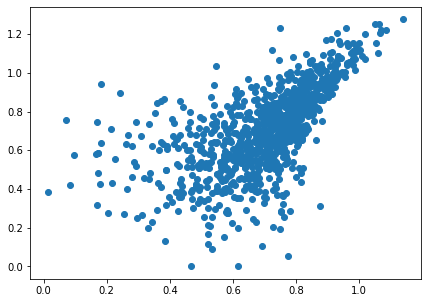

Epoch 501
loss = 0.004367469344288111
Epoch 502
loss = 0.004371792543679476
Epoch 503
loss = 0.00435749301686883
Epoch 504
loss = 0.004326962865889072
Epoch 505
loss = 0.004320349544286728
Epoch 506
loss = 0.00434174295514822
Epoch 507
loss = 0.00431938236579299
Epoch 508
loss = 0.004379314370453358
Epoch 509
loss = 0.004311286378651857
Epoch 510
loss = 0.00434113247320056
Epoch 511
loss = 0.004335644189268351
Epoch 512
loss = 0.004328430630266666
Epoch 513
loss = 0.004339472856372595
Epoch 514
loss = 0.004335613455623388
Epoch 515
loss = 0.0044001187197864056
Epoch 516
loss = 0.00436063390225172
Epoch 517
loss = 0.004368717782199383
Epoch 518
loss = 0.004325764253735542
Epoch 519
loss = 0.0043777343817055225
Epoch 520
loss = 0.004342023283243179
Epoch 521
loss = 0.004342872649431229
Epoch 522
loss = 0.004310609307140112
Epoch 523
loss = 0.004349720664322376
Epoch 524
loss = 0.004381041973829269
Epoch 525
loss = 0.004356537479907274
Epoch 526
loss = 0.0043557872995734215
Epoch 527
loss

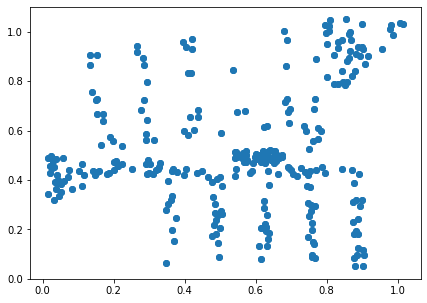

plot reconstruction distribution


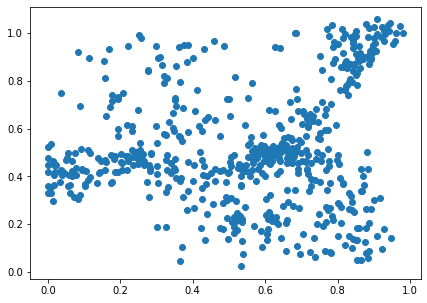

generate synthetic data


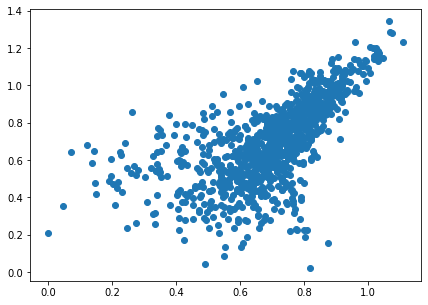

Epoch 601
loss = 0.004370802082121372
Epoch 602
loss = 0.004307834431529045
Epoch 603
loss = 0.004328512586653233
Epoch 604
loss = 0.004344796296209097
Epoch 605
loss = 0.004332649055868387
Epoch 606
loss = 0.004366639535874128
Epoch 607
loss = 0.004339381121098995
Epoch 608
loss = 0.0043041822500526905
Epoch 609
loss = 0.004346037749201059
Epoch 610
loss = 0.004335754085332155
Epoch 611
loss = 0.004334769677370787
Epoch 612
loss = 0.004338833969086409
Epoch 613
loss = 0.004367579240351915
Epoch 614
loss = 0.004351465962827206
Epoch 615
loss = 0.004324956797063351
Epoch 616
loss = 0.004341810010373592
Epoch 617
loss = 0.0043445490300655365
Epoch 618
loss = 0.004358034115284681
Epoch 619
loss = 0.004346766043454409
Epoch 620
loss = 0.00431183073669672
Epoch 621
loss = 0.004358155187219381
Epoch 622
loss = 0.0043731629848480225
Epoch 623
loss = 0.004338988568633795
Epoch 624
loss = 0.004325765650719404
Epoch 625
loss = 0.0043394058011472225
Epoch 626
loss = 0.004328765440732241
Epoch 627

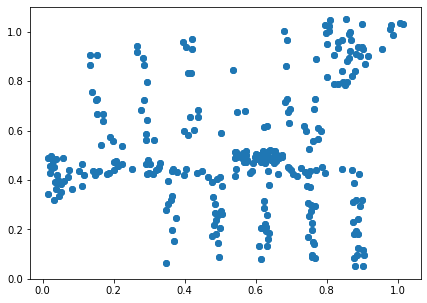

plot reconstruction distribution


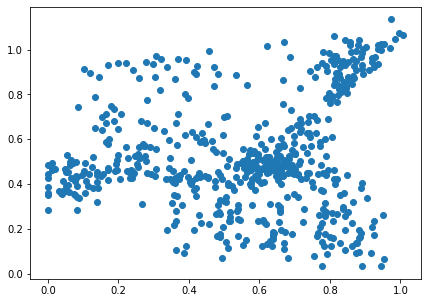

generate synthetic data


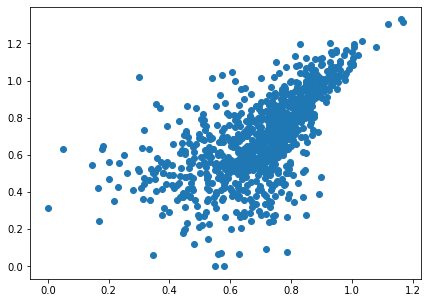

Epoch 701
loss = 0.004339210223406553
Epoch 702
loss = 0.004297858569771051
Epoch 703
loss = 0.004281766712665558
Epoch 704
loss = 0.004364469088613987
Epoch 705
loss = 0.004316138103604317
Epoch 706
loss = 0.004291325341910124
Epoch 707
loss = 0.004315609112381935
Epoch 708
loss = 0.0043538520112633705
Epoch 709
loss = 0.004296868573874235
Epoch 710
loss = 0.004364591091871262
Epoch 711
loss = 0.004359501414000988
Epoch 712
loss = 0.004326916299760342
Epoch 713
loss = 0.004334017168730497
Epoch 714
loss = 0.004351066425442696
Epoch 715
loss = 0.004304219037294388
Epoch 716
loss = 0.0043119448237121105
Epoch 717
loss = 0.004353251773864031
Epoch 718
loss = 0.004353079479187727
Epoch 719
loss = 0.004304650239646435
Epoch 720
loss = 0.004323429893702269
Epoch 721
loss = 0.004336612764745951
Epoch 722
loss = 0.004338772501796484
Epoch 723
loss = 0.004323662258684635
Epoch 724
loss = 0.004359738435596228
Epoch 725
loss = 0.0043184407986700535
Epoch 726
loss = 0.004356755409389734
Epoch 727

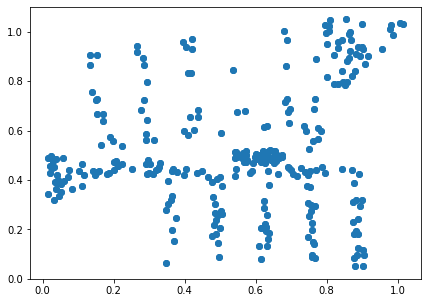

plot reconstruction distribution


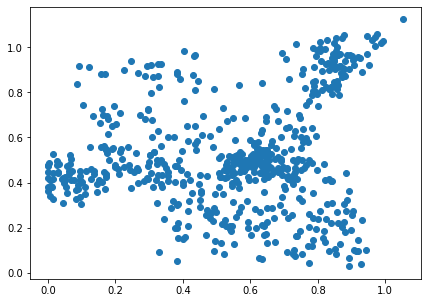

generate synthetic data


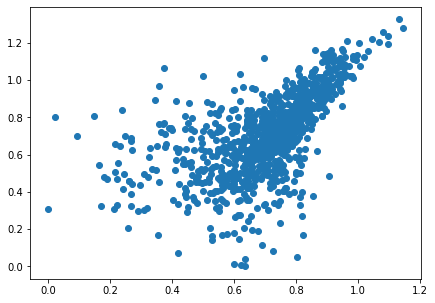

Epoch 801
loss = 0.004315967205911875
Epoch 802
loss = 0.004296007566154003
Epoch 803
loss = 0.004336841404438019
Epoch 804
loss = 0.004323875997215509
Epoch 805
loss = 0.004347673617303371
Epoch 806
loss = 0.004373126197606325
Epoch 807
loss = 0.004305794835090637
Epoch 808
loss = 0.004299864638596773
Epoch 809
loss = 0.00435049831867218
Epoch 810
loss = 0.00428850157186389
Epoch 811
loss = 0.004329025745391846
Epoch 812
loss = 0.004352495074272156
Epoch 813
loss = 0.004327918402850628
Epoch 814
loss = 0.004324643407016993
Epoch 815
loss = 0.004333364777266979
Epoch 816
loss = 0.004314015619456768
Epoch 817
loss = 0.004341761115938425
Epoch 818
loss = 0.004329729825258255
Epoch 819
loss = 0.0043057710863649845
Epoch 820
loss = 0.004327735397964716
Epoch 821
loss = 0.004350703675299883
Epoch 822
loss = 0.004318763501942158
Epoch 823
loss = 0.004328852519392967
Epoch 824
loss = 0.004332021810114384
Epoch 825
loss = 0.004331745207309723
Epoch 826
loss = 0.004323785658925772
Epoch 827
los

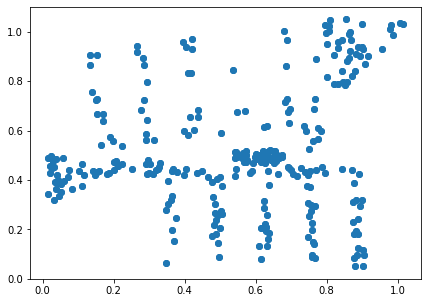

plot reconstruction distribution


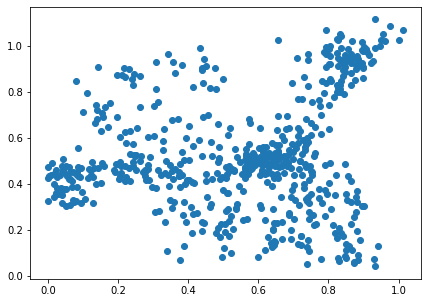

generate synthetic data


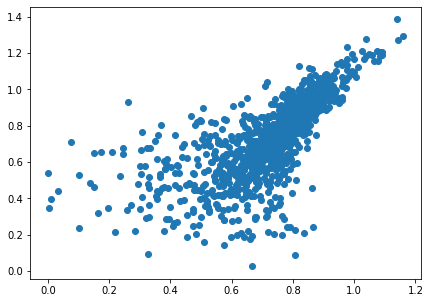

Epoch 901
loss = 0.004324524663388729
Epoch 902
loss = 0.004296840634196997
Epoch 903
loss = 0.004316554870456457
Epoch 904
loss = 0.0043197982013225555
Epoch 905
loss = 0.004322530701756477
Epoch 906
loss = 0.004310294985771179
Epoch 907
loss = 0.004320917651057243
Epoch 908
loss = 0.004298360086977482
Epoch 909
loss = 0.004308774136006832
Epoch 910
loss = 0.004315297584980726
Epoch 911
loss = 0.004327570553869009
Epoch 912
loss = 0.0043285079300403595
Epoch 913
loss = 0.004313504323363304
Epoch 914
loss = 0.004333709366619587
Epoch 915
loss = 0.004304548259824514
Epoch 916
loss = 0.004317081533372402
Epoch 917
loss = 0.004290977492928505
Epoch 918
loss = 0.004316474311053753
Epoch 919
loss = 0.004315054044127464
Epoch 920
loss = 0.004338059574365616
Epoch 921
loss = 0.004320243373513222
Epoch 922
loss = 0.004316813312470913
Epoch 923
loss = 0.004316798411309719
Epoch 924
loss = 0.004331289790570736
Epoch 925
loss = 0.004331192001700401
Epoch 926
loss = 0.004313813056796789
Epoch 927


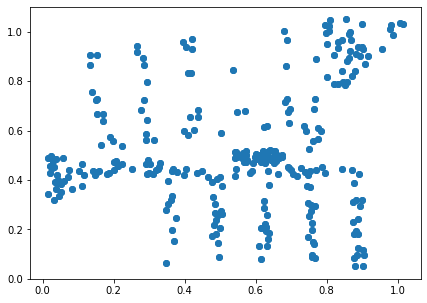

plot reconstruction distribution


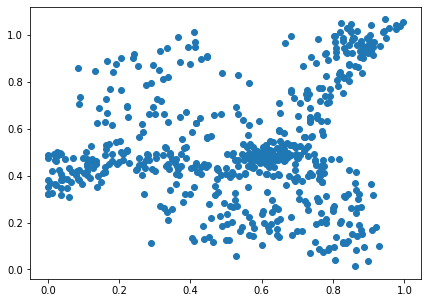

generate synthetic data


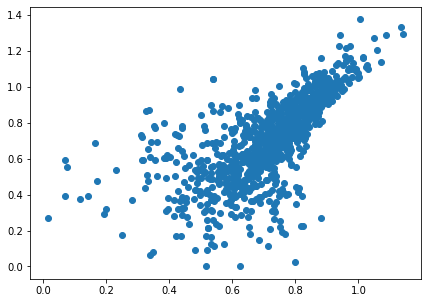

Epoch 1001
loss = 0.0043003796599805355
Epoch 1002
loss = 0.0043019684962928295
Epoch 1003
loss = 0.004296222236007452
Epoch 1004
loss = 0.004338387865573168
Epoch 1005
loss = 0.004327292088419199
Epoch 1006
loss = 0.004336542449891567
Epoch 1007
loss = 0.0042944964952766895
Epoch 1008
loss = 0.004360034130513668
Epoch 1009
loss = 0.00434671388939023
Epoch 1010
loss = 0.004334660712629557
Epoch 1011
loss = 0.004311719909310341
Epoch 1012
loss = 0.004337645135819912
Epoch 1013
loss = 0.004331692587584257
Epoch 1014
loss = 0.004283706657588482
Epoch 1015
loss = 0.0043354216031730175
Epoch 1016
loss = 0.004311955068260431
Epoch 1017
loss = 0.00432395888492465
Epoch 1018
loss = 0.00432238494977355
Epoch 1019
loss = 0.004315621685236692
Epoch 1020
loss = 0.004357362166047096
Epoch 1021
loss = 0.004339527804404497
Epoch 1022
loss = 0.004336160141974688
Epoch 1023
loss = 0.0042911553755402565
Epoch 1024
loss = 0.004311048425734043
Epoch 1025
loss = 0.004316738806664944
Epoch 1026
loss = 0.004

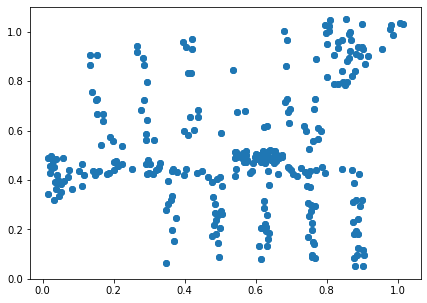

plot reconstruction distribution


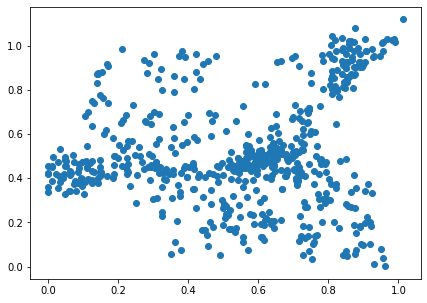

generate synthetic data


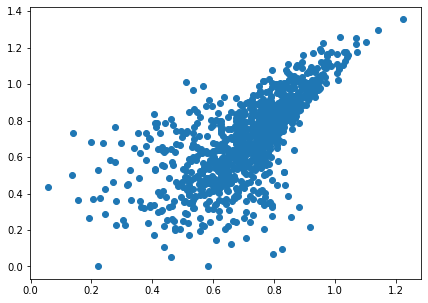

Epoch 1101
loss = 0.004322083666920662
Epoch 1102
loss = 0.004317678511142731
Epoch 1103
loss = 0.004311605356633663
Epoch 1104
loss = 0.004313063807785511
Epoch 1105
loss = 0.004287325777113438
Epoch 1106
loss = 0.004312107805162668
Epoch 1107
loss = 0.004331114236265421
Epoch 1108
loss = 0.004276245832443237
Epoch 1109
loss = 0.004313699435442686
Epoch 1110
loss = 0.004323210567235947
Epoch 1111
loss = 0.004330633673816919
Epoch 1112
loss = 0.004326456226408482
Epoch 1113
loss = 0.004304908681660891
Epoch 1114
loss = 0.004308962728828192
Epoch 1115
loss = 0.004270764533430338
Epoch 1116
loss = 0.004306501243263483
Epoch 1117
loss = 0.004313033539801836
Epoch 1118
loss = 0.004299369640648365
Epoch 1119
loss = 0.004286737646907568
Epoch 1120
loss = 0.004321753978729248
Epoch 1121
loss = 0.004290866665542126
Epoch 1122
loss = 0.004322660621255636
Epoch 1123
loss = 0.004287646617740393
Epoch 1124
loss = 0.004296897444874048
Epoch 1125
loss = 0.004302568268030882
Epoch 1126
loss = 0.00430

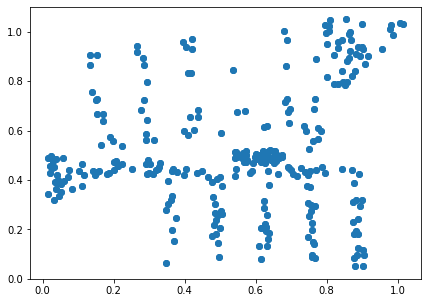

plot reconstruction distribution


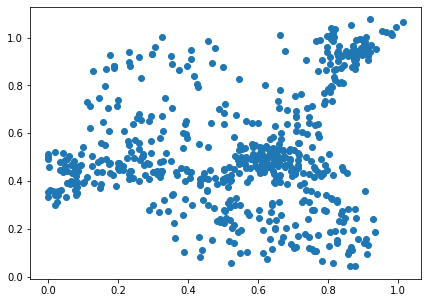

generate synthetic data


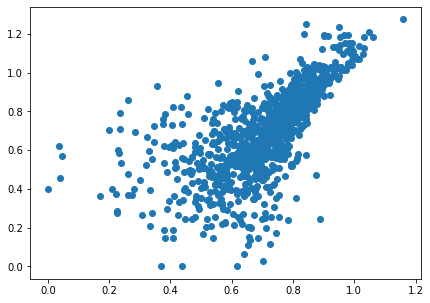

Epoch 1201
loss = 0.004290565382689238
Epoch 1202
loss = 0.004299378488212824
Epoch 1203
loss = 0.004271319136023521
Epoch 1204
loss = 0.004277157597243786
Epoch 1205
loss = 0.004294642712920904
Epoch 1206
loss = 0.004289514385163784
Epoch 1207
loss = 0.004287624731659889
Epoch 1208
loss = 0.004306231625378132
Epoch 1209
loss = 0.0042570303194224834
Epoch 1210
loss = 0.0042899418622255325
Epoch 1211
loss = 0.004292554222047329
Epoch 1212
loss = 0.004283482674509287
Epoch 1213
loss = 0.004279169254004955
Epoch 1214
loss = 0.0042762006632983685
Epoch 1215
loss = 0.0043147290125489235
Epoch 1216
loss = 0.004280200228095055
Epoch 1217
loss = 0.004299040883779526
Epoch 1218
loss = 0.004293185193091631
Epoch 1219
loss = 0.004287098068743944
Epoch 1220
loss = 0.004281419795006514
Epoch 1221
loss = 0.004279875662177801
Epoch 1222
loss = 0.004311916418373585
Epoch 1223
loss = 0.004288847092539072
Epoch 1224
loss = 0.0043156822212040424
Epoch 1225
loss = 0.004295622929930687
Epoch 1226
loss = 0.

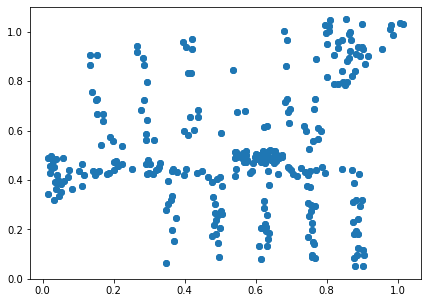

plot reconstruction distribution


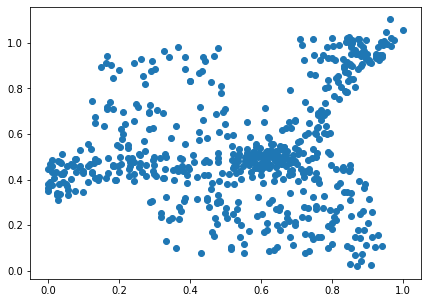

generate synthetic data


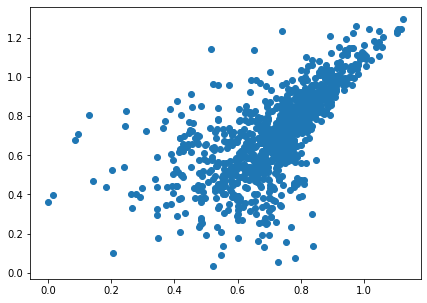

Epoch 1301
loss = 0.00425585824996233
Epoch 1302
loss = 0.004297938663512468
Epoch 1303
loss = 0.004305293317884207
Epoch 1304
loss = 0.004289899952709675
Epoch 1305
loss = 0.004345166031271219
Epoch 1306
loss = 0.004306512419134378
Epoch 1307
loss = 0.0043104044161736965
Epoch 1308
loss = 0.004302695393562317
Epoch 1309
loss = 0.0043015857227146626
Epoch 1310
loss = 0.004295919556170702
Epoch 1311
loss = 0.004255017731338739
Epoch 1312
loss = 0.004310197662562132
Epoch 1313
loss = 0.004312978126108646
Epoch 1314
loss = 0.004259093198925257
Epoch 1315
loss = 0.004300543572753668
Epoch 1316
loss = 0.004320950713008642
Epoch 1317
loss = 0.0043007442727684975
Epoch 1318
loss = 0.004316211212426424
Epoch 1319
loss = 0.004319921601563692
Epoch 1320
loss = 0.004293809179216623
Epoch 1321
loss = 0.004283629823476076
Epoch 1322
loss = 0.004294304642826319
Epoch 1323
loss = 0.004273005295544863
Epoch 1324
loss = 0.004288857337087393
Epoch 1325
loss = 0.00430570263415575
Epoch 1326
loss = 0.0043

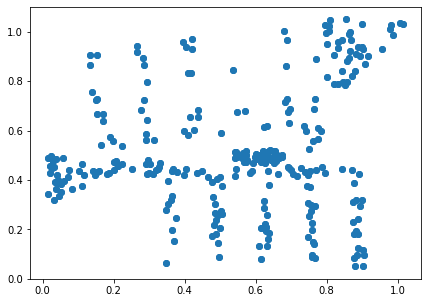

plot reconstruction distribution


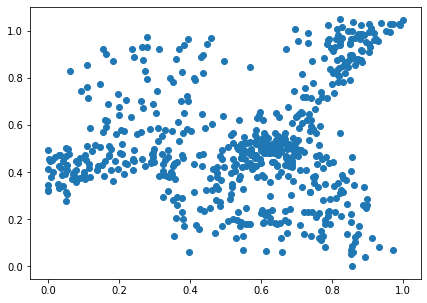

generate synthetic data


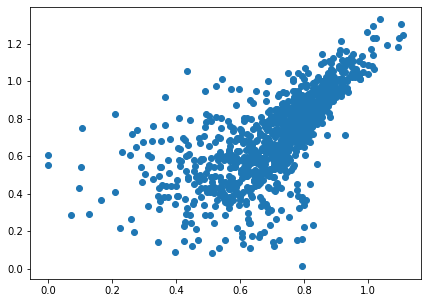

Epoch 1401
loss = 0.004329247400164604
Epoch 1402
loss = 0.004292570985853672
Epoch 1403
loss = 0.004306725226342678
Epoch 1404
loss = 0.004284184891730547
Epoch 1405
loss = 0.004308787640184164
Epoch 1406
loss = 0.004340099170804024
Epoch 1407
loss = 0.004312755540013313
Epoch 1408
loss = 0.0043158624321222305
Epoch 1409
loss = 0.0042826090939342976
Epoch 1410
loss = 0.004303016234189272
Epoch 1411
loss = 0.004298469517379999
Epoch 1412
loss = 0.004275391343981028
Epoch 1413
loss = 0.004275707993656397
Epoch 1414
loss = 0.004305202513933182
Epoch 1415
loss = 0.004289817996323109
Epoch 1416
loss = 0.004339146427810192
Epoch 1417
loss = 0.004274243488907814
Epoch 1418
loss = 0.004308224190026522
Epoch 1419
loss = 0.0042868442833423615
Epoch 1420
loss = 0.004270240664482117
Epoch 1421
loss = 0.0042803301475942135
Epoch 1422
loss = 0.004265279043465853
Epoch 1423
loss = 0.0042966390028595924
Epoch 1424
loss = 0.004269534256309271
Epoch 1425
loss = 0.004301087465137243
Epoch 1426
loss = 0.

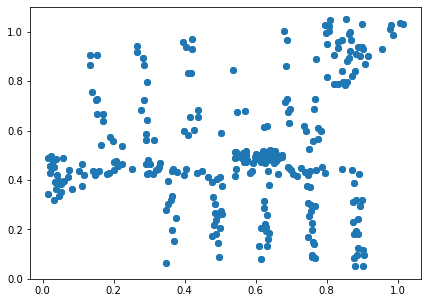

plot reconstruction distribution


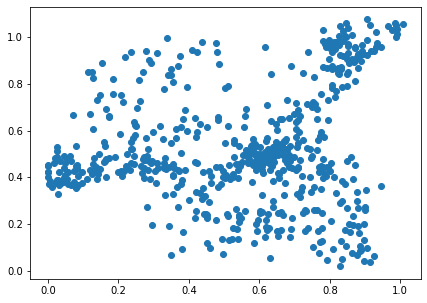

generate synthetic data


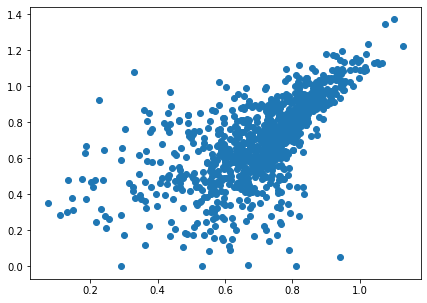

Epoch 1501
loss = 0.004306891933083534
Epoch 1502
loss = 0.004279125016182661
Epoch 1503
loss = 0.004326251335442066
Epoch 1504
loss = 0.004270012490451336
Epoch 1505
loss = 0.004262019880115986
Epoch 1506
loss = 0.0042764246463775635
Epoch 1507
loss = 0.00427638366818428
Epoch 1508
loss = 0.0042727310210466385
Epoch 1509
loss = 0.004271173384040594
Epoch 1510
loss = 0.0042693521827459335
Epoch 1511
loss = 0.00424480764195323
Epoch 1512
loss = 0.004297296050935984
Epoch 1513
loss = 0.004294456914067268
Epoch 1514
loss = 0.004271371755748987
Epoch 1515
loss = 0.004289754666388035
Epoch 1516
loss = 0.004311683122068644
Epoch 1517
loss = 0.004285045899450779
Epoch 1518
loss = 0.004298812244087458
Epoch 1519
loss = 0.004268889781087637
Epoch 1520
loss = 0.004246664699167013
Epoch 1521
loss = 0.00424925284460187
Epoch 1522
loss = 0.004257552791386843
Epoch 1523
loss = 0.004258942324668169
Epoch 1524
loss = 0.004288862459361553
Epoch 1525
loss = 0.004362661857157946
Epoch 1526
loss = 0.00426

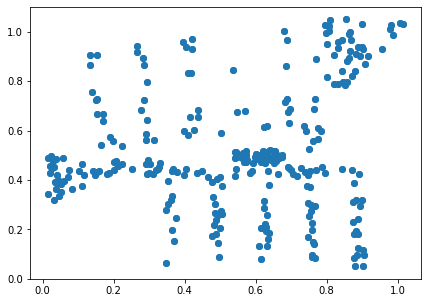

plot reconstruction distribution


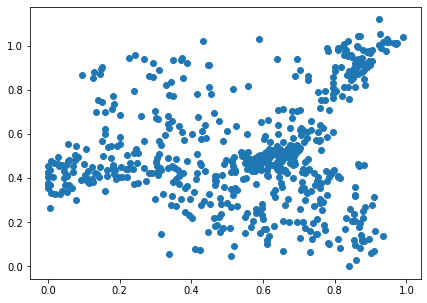

generate synthetic data


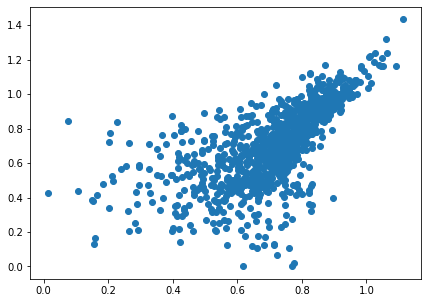

Epoch 1601
loss = 0.004282327368855476
Epoch 1602
loss = 0.004293476697057486
Epoch 1603
loss = 0.004277426283806562
Epoch 1604
loss = 0.0042899493128061295
Epoch 1605
loss = 0.00430300273001194
Epoch 1606
loss = 0.004263412207365036
Epoch 1607
loss = 0.004262229427695274
Epoch 1608
loss = 0.004257240332663059
Epoch 1609
loss = 0.0042875236831605434
Epoch 1610
loss = 0.004280244931578636
Epoch 1611
loss = 0.004259100649505854
Epoch 1612
loss = 0.004304633941501379
Epoch 1613
loss = 0.004276776686310768
Epoch 1614
loss = 0.00428035156801343
Epoch 1615
loss = 0.004292013589292765
Epoch 1616
loss = 0.004258084110915661
Epoch 1617
loss = 0.004299868829548359
Epoch 1618
loss = 0.004296257160604
Epoch 1619
loss = 0.004298365209251642
Epoch 1620
loss = 0.004245874937623739
Epoch 1621
loss = 0.004255241248756647
Epoch 1622
loss = 0.004276869352906942
Epoch 1623
loss = 0.004268530756235123
Epoch 1624
loss = 0.004245137795805931
Epoch 1625
loss = 0.00426497682929039
Epoch 1626
loss = 0.004280629

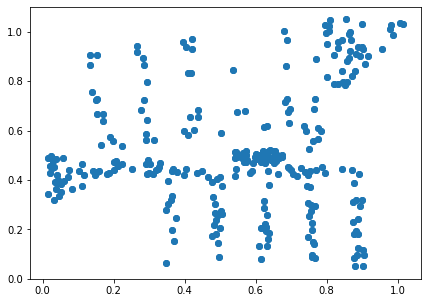

plot reconstruction distribution


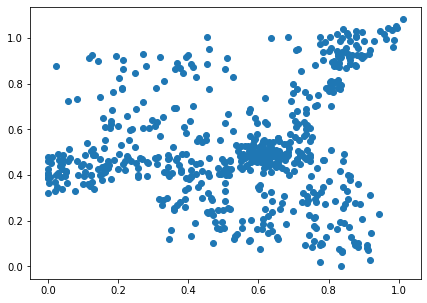

generate synthetic data


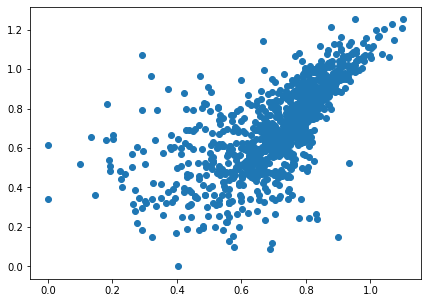

Epoch 1701
loss = 0.004284565802663565
Epoch 1702
loss = 0.004306497517973185
Epoch 1703
loss = 0.004271489102393389
Epoch 1704
loss = 0.0043031140230596066
Epoch 1705
loss = 0.0043186163529753685
Epoch 1706
loss = 0.004277747590094805
Epoch 1707
loss = 0.004257081542164087
Epoch 1708
loss = 0.004260055720806122
Epoch 1709
loss = 0.004275789484381676
Epoch 1710
loss = 0.004247013945132494
Epoch 1711
loss = 0.004282337613403797
Epoch 1712
loss = 0.004247585311532021
Epoch 1713
loss = 0.0042760553769767284
Epoch 1714
loss = 0.004307203460484743
Epoch 1715
loss = 0.004280151799321175
Epoch 1716
loss = 0.004292518366128206
Epoch 1717
loss = 0.0042757620103657246
Epoch 1718
loss = 0.004262562375515699
Epoch 1719
loss = 0.0043222191743552685
Epoch 1720
loss = 0.004257374908775091
Epoch 1721
loss = 0.004281631670892239
Epoch 1722
loss = 0.0042679086327552795
Epoch 1723
loss = 0.004293492063879967
Epoch 1724
loss = 0.0042724572122097015
Epoch 1725
loss = 0.00429438054561615
Epoch 1726
loss = 0

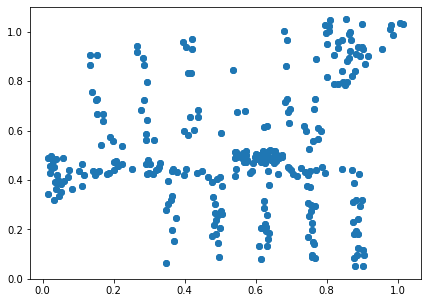

plot reconstruction distribution


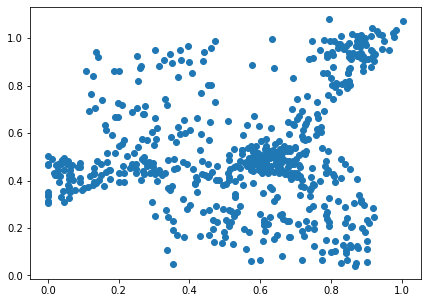

generate synthetic data


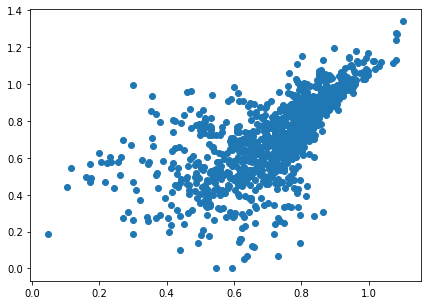

Epoch 1801
loss = 0.004293662961572409
Epoch 1802
loss = 0.004270566161721945
Epoch 1803
loss = 0.004288326948881149
Epoch 1804
loss = 0.00424541812390089
Epoch 1805
loss = 0.004281508270651102
Epoch 1806
loss = 0.004262004047632217
Epoch 1807
loss = 0.004293197300285101
Epoch 1808
loss = 0.004281098023056984
Epoch 1809
loss = 0.004279018845409155
Epoch 1810
loss = 0.004281520377844572
Epoch 1811
loss = 0.004290474113076925
Epoch 1812
loss = 0.00428744638338685
Epoch 1813
loss = 0.004270921926945448
Epoch 1814
loss = 0.004257766529917717
Epoch 1815
loss = 0.004268455784767866
Epoch 1816
loss = 0.004201266448944807
Epoch 1817
loss = 0.004272065591067076
Epoch 1818
loss = 0.004252726677805185
Epoch 1819
loss = 0.00429509487003088
Epoch 1820
loss = 0.004294190555810928
Epoch 1821
loss = 0.0042717005126178265
Epoch 1822
loss = 0.004269215278327465
Epoch 1823
loss = 0.0042966450564563274
Epoch 1824
loss = 0.004306056071072817
Epoch 1825
loss = 0.00426736194640398
Epoch 1826
loss = 0.0042611

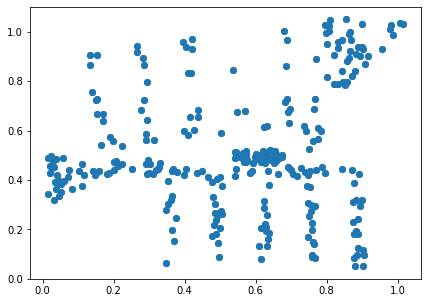

plot reconstruction distribution


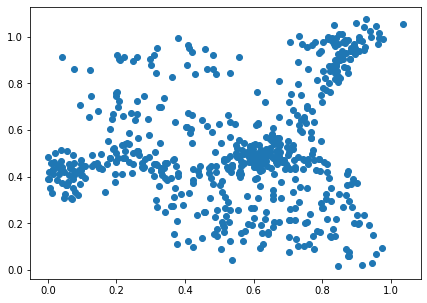

generate synthetic data


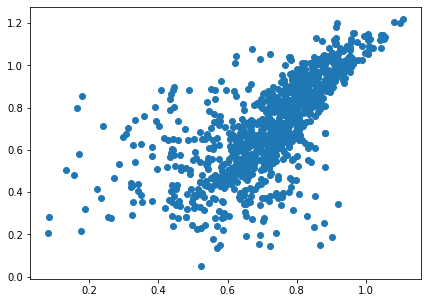

Epoch 1901
loss = 0.004283387213945389
Epoch 1902
loss = 0.004271765239536762
Epoch 1903
loss = 0.004285059403628111
Epoch 1904
loss = 0.0042867353186011314
Epoch 1905
loss = 0.004298076033592224
Epoch 1906
loss = 0.004311277996748686
Epoch 1907
loss = 0.004297021310776472
Epoch 1908
loss = 0.0042632524855434895
Epoch 1909
loss = 0.0042802440002560616
Epoch 1910
loss = 0.004279155284166336
Epoch 1911
loss = 0.004263858310878277
Epoch 1912
loss = 0.004260384943336248
Epoch 1913
loss = 0.004217991605401039
Epoch 1914
loss = 0.004262444097548723
Epoch 1915
loss = 0.0042855264618992805
Epoch 1916
loss = 0.00429221335798502
Epoch 1917
loss = 0.004274188075214624
Epoch 1918
loss = 0.004299994558095932
Epoch 1919
loss = 0.004267008975148201
Epoch 1920
loss = 0.004254842642694712
Epoch 1921
loss = 0.004259817767888308
Epoch 1922
loss = 0.004268190823495388
Epoch 1923
loss = 0.004256453365087509
Epoch 1924
loss = 0.004238483961671591
Epoch 1925
loss = 0.004310134798288345
Epoch 1926
loss = 0.00

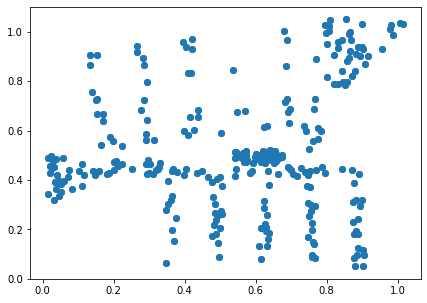

plot reconstruction distribution


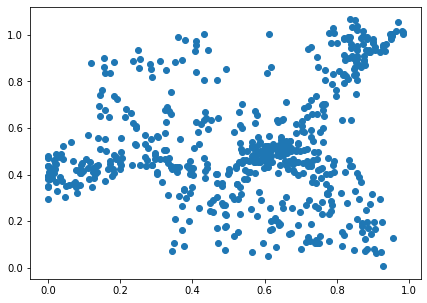

generate synthetic data


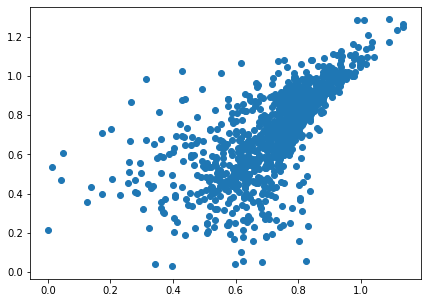

Epoch 2001
loss = 0.004238431807607412
Epoch 2002
loss = 0.0042569441720843315
Epoch 2003
loss = 0.004312191624194384
Epoch 2004
loss = 0.004254118073731661
Epoch 2005
loss = 0.00432136096060276
Epoch 2006
loss = 0.0042436751537024975
Epoch 2007
loss = 0.004260268062353134
Epoch 2008
loss = 0.004266196396201849
Epoch 2009
loss = 0.004249000456184149
Epoch 2010
loss = 0.004248257726430893
Epoch 2011
loss = 0.004243818577378988
Epoch 2012
loss = 0.004242091905325651
Epoch 2013
loss = 0.004249745048582554
Epoch 2014
loss = 0.004294225480407476
Epoch 2015
loss = 0.004302654415369034
Epoch 2016
loss = 0.004234191495925188
Epoch 2017
loss = 0.004261943511664867
Epoch 2018
loss = 0.0042633432894945145
Epoch 2019
loss = 0.0042306953109800816
Epoch 2020
loss = 0.004266575910151005
Epoch 2021
loss = 0.004268359392881393
Epoch 2022
loss = 0.004228778183460236
Epoch 2023
loss = 0.004264825955033302
Epoch 2024
loss = 0.004245994612574577
Epoch 2025
loss = 0.004266655072569847
Epoch 2026
loss = 0.00

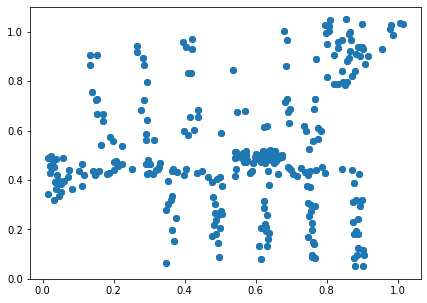

plot reconstruction distribution


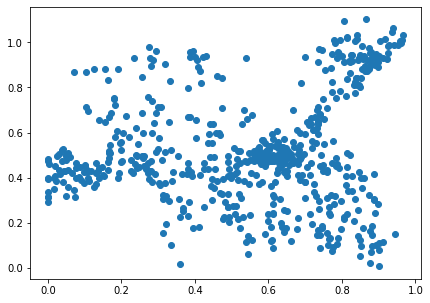

generate synthetic data


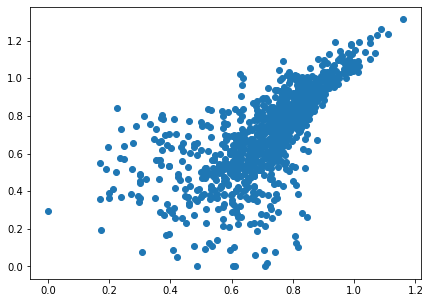

Epoch 2101
loss = 0.004265724215656519
Epoch 2102
loss = 0.004248369950801134
Epoch 2103
loss = 0.004242171999067068
Epoch 2104
loss = 0.0042923265136778355
Epoch 2105
loss = 0.004259593319147825
Epoch 2106
loss = 0.004272931255400181
Epoch 2107
loss = 0.004243507049977779
Epoch 2108
loss = 0.004261497873812914
Epoch 2109
loss = 0.004264053888618946
Epoch 2110
loss = 0.004264187533408403
Epoch 2111
loss = 0.004269613418728113
Epoch 2112
loss = 0.0042484658770263195
Epoch 2113
loss = 0.0042389086447656155
Epoch 2114
loss = 0.0042715612798929214
Epoch 2115
loss = 0.00429200055077672
Epoch 2116
loss = 0.004280025605112314
Epoch 2117
loss = 0.004254698287695646
Epoch 2118
loss = 0.004214152693748474
Epoch 2119
loss = 0.004252071026712656
Epoch 2120
loss = 0.004276291001588106
Epoch 2121
loss = 0.004246945027261972
Epoch 2122
loss = 0.004281436093151569
Epoch 2123
loss = 0.004229191690683365
Epoch 2124
loss = 0.0042432029731571674
Epoch 2125
loss = 0.0042670550756156445
Epoch 2126
loss = 0.

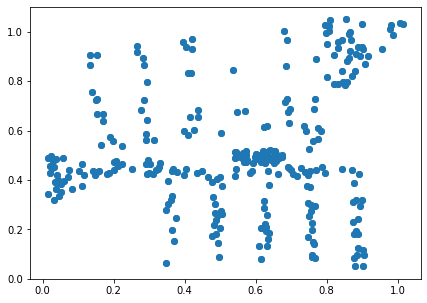

plot reconstruction distribution


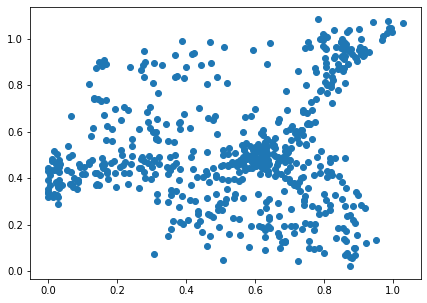

generate synthetic data


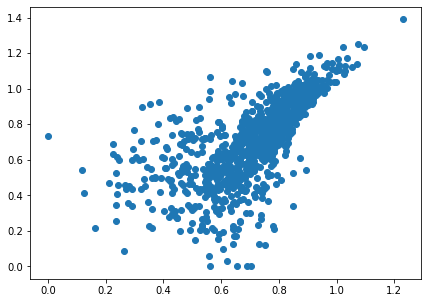

Epoch 2201
loss = 0.004235181026160717
Epoch 2202
loss = 0.0042311688885092735
Epoch 2203
loss = 0.004243462812155485
Epoch 2204
loss = 0.004295005928725004
Epoch 2205
loss = 0.004252682439982891
Epoch 2206
loss = 0.00426508067175746
Epoch 2207
loss = 0.004298887215554714
Epoch 2208
loss = 0.0042560589499771595
Epoch 2209
loss = 0.004230353515595198
Epoch 2210
loss = 0.004263974726200104
Epoch 2211
loss = 0.004267604555934668
Epoch 2212
loss = 0.004222636576741934
Epoch 2213
loss = 0.0042244065552949905
Epoch 2214
loss = 0.004280758090317249
Epoch 2215
loss = 0.004264972172677517
Epoch 2216
loss = 0.004281040746718645
Epoch 2217
loss = 0.004284488502889872
Epoch 2218
loss = 0.0042235273867845535
Epoch 2219
loss = 0.004271140322089195
Epoch 2220
loss = 0.004209413658827543
Epoch 2221
loss = 0.004224950913339853
Epoch 2222
loss = 0.004262859933078289
Epoch 2223
loss = 0.004234150517731905
Epoch 2224
loss = 0.004217144101858139
Epoch 2225
loss = 0.004262126516550779
Epoch 2226
loss = 0.00

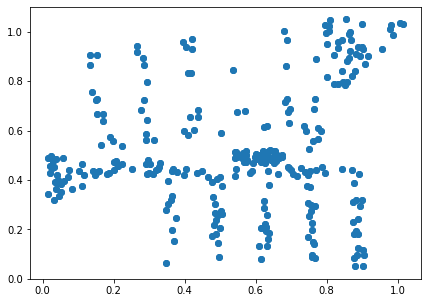

plot reconstruction distribution


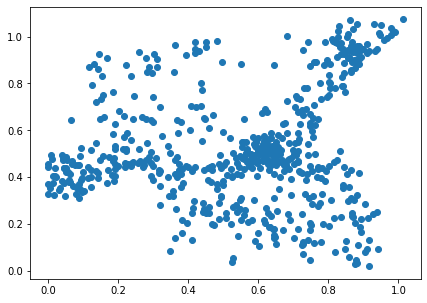

generate synthetic data


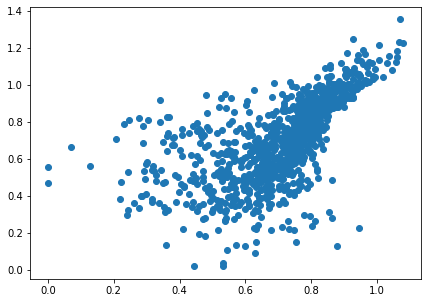

Epoch 2301
loss = 0.004230906255543232
Epoch 2302
loss = 0.004255197010934353
Epoch 2303
loss = 0.0042578354477882385
Epoch 2304
loss = 0.004263665992766619
Epoch 2305
loss = 0.004254524130374193
Epoch 2306
loss = 0.004256349988281727
Epoch 2307
loss = 0.004242844879627228
Epoch 2308
loss = 0.004247529897838831
Epoch 2309
loss = 0.004247716162353754
Epoch 2310
loss = 0.004225593991577625
Epoch 2311
loss = 0.004249618388712406
Epoch 2312
loss = 0.004280834924429655
Epoch 2313
loss = 0.004214588087052107
Epoch 2314
loss = 0.004237728659063578
Epoch 2315
loss = 0.004243040923029184
Epoch 2316
loss = 0.004277479834854603
Epoch 2317
loss = 0.0042403386905789375
Epoch 2318
loss = 0.004231367725878954
Epoch 2319
loss = 0.004254449158906937
Epoch 2320
loss = 0.004230964463204145
Epoch 2321
loss = 0.004235039930790663
Epoch 2322
loss = 0.004205355420708656
Epoch 2323
loss = 0.004234823398292065
Epoch 2324
loss = 0.0042456756345927715
Epoch 2325
loss = 0.00425995048135519
Epoch 2326
loss = 0.004

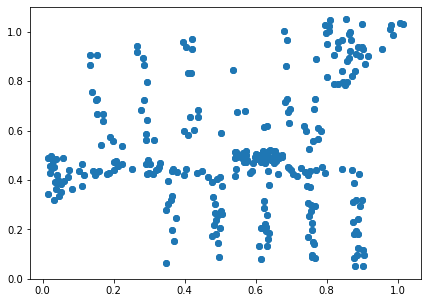

plot reconstruction distribution


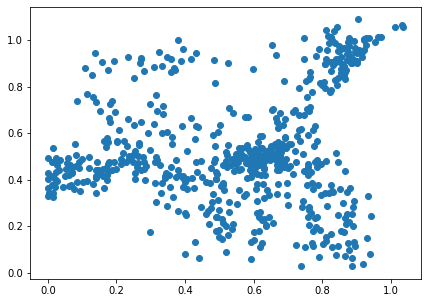

generate synthetic data


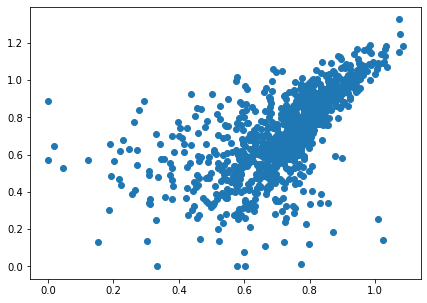

Epoch 2401
loss = 0.004261476453393698
Epoch 2402
loss = 0.004238941241055727
Epoch 2403
loss = 0.004245531279593706
Epoch 2404
loss = 0.004221300128847361
Epoch 2405
loss = 0.004226392135024071
Epoch 2406
loss = 0.004242716357111931
Epoch 2407
loss = 0.004258906003087759
Epoch 2408
loss = 0.004280956462025642
Epoch 2409
loss = 0.004261270631104708
Epoch 2410
loss = 0.004235333763062954
Epoch 2411
loss = 0.00428623566403985
Epoch 2412
loss = 0.00422607222571969
Epoch 2413
loss = 0.004266855772584677
Epoch 2414
loss = 0.004242764785885811
Epoch 2415
loss = 0.004246893338859081
Epoch 2416
loss = 0.00426469137892127
Epoch 2417
loss = 0.004253698512911797
Epoch 2418
loss = 0.004220819566398859
Epoch 2419
loss = 0.004248557612299919
Epoch 2420
loss = 0.004219693597406149
Epoch 2421
loss = 0.004287670366466045
Epoch 2422
loss = 0.004269432742148638
Epoch 2423
loss = 0.004242088180035353
Epoch 2424
loss = 0.004261698108166456
Epoch 2425
loss = 0.004262178670614958
Epoch 2426
loss = 0.00421082

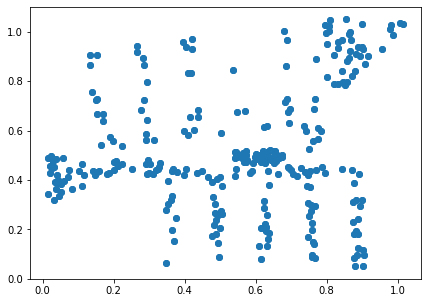

plot reconstruction distribution


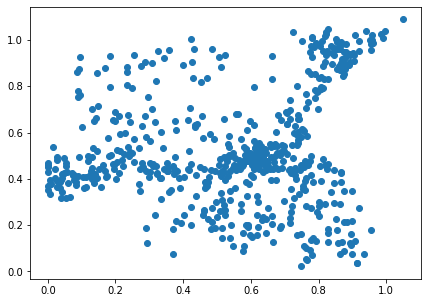

generate synthetic data


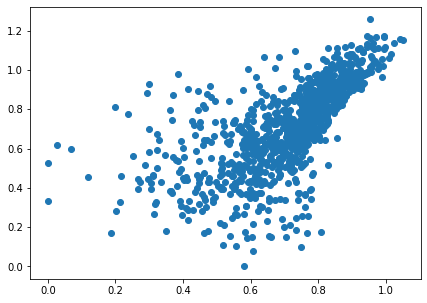

Epoch 2501
loss = 0.0042319823987782
Epoch 2502
loss = 0.004280553199350834
Epoch 2503
loss = 0.004223513882607222
Epoch 2504
loss = 0.0042861029505729675
Epoch 2505
loss = 0.0042705051600933075
Epoch 2506
loss = 0.004274710547178984
Epoch 2507
loss = 0.004268066491931677
Epoch 2508
loss = 0.004235978703945875
Epoch 2509
loss = 0.004253622610121965
Epoch 2510
loss = 0.004211703781038523
Epoch 2511
loss = 0.004246838856488466
Epoch 2512
loss = 0.004243121948093176
Epoch 2513
loss = 0.004239658359438181
Epoch 2514
loss = 0.004279450513422489
Epoch 2515
loss = 0.004240932408720255
Epoch 2516
loss = 0.004254328552633524
Epoch 2517
loss = 0.004279894754290581
Epoch 2518
loss = 0.004218116402626038
Epoch 2519
loss = 0.00425978796556592
Epoch 2520
loss = 0.0042616091668605804
Epoch 2521
loss = 0.00428168335929513
Epoch 2522
loss = 0.00425446592271328
Epoch 2523
loss = 0.004225664772093296
Epoch 2524
loss = 0.004223986994475126
Epoch 2525
loss = 0.004225785844027996
Epoch 2526
loss = 0.0043020

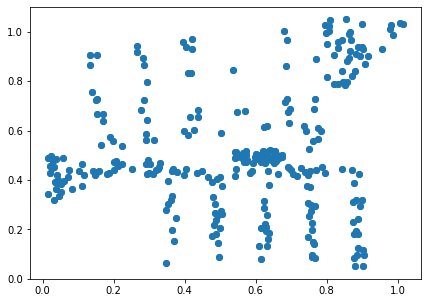

plot reconstruction distribution


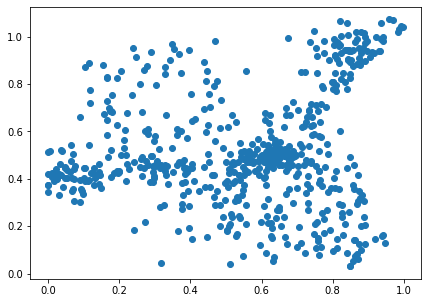

generate synthetic data


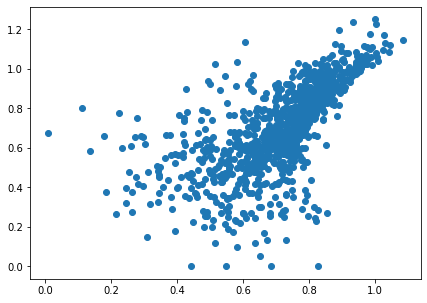

Epoch 2601
loss = 0.004250816069543362
Epoch 2602
loss = 0.004212167579680681
Epoch 2603
loss = 0.004283600486814976
Epoch 2604
loss = 0.004239915870130062
Epoch 2605
loss = 0.004195672459900379
Epoch 2606
loss = 0.004249631427228451
Epoch 2607
loss = 0.004258883651345968
Epoch 2608
loss = 0.004235115833580494
Epoch 2609
loss = 0.004244755022227764
Epoch 2610
loss = 0.004209340550005436
Epoch 2611
loss = 0.00423075957223773
Epoch 2612
loss = 0.004220577422529459
Epoch 2613
loss = 0.00427074171602726
Epoch 2614
loss = 0.004280868452042341
Epoch 2615
loss = 0.004224411677569151
Epoch 2616
loss = 0.004294341895729303
Epoch 2617
loss = 0.004245928954333067
Epoch 2618
loss = 0.004251099191606045
Epoch 2619
loss = 0.004257038235664368
Epoch 2620
loss = 0.004242603201419115
Epoch 2621
loss = 0.004229612182825804
Epoch 2622
loss = 0.0042448705062270164
Epoch 2623
loss = 0.004230852704495192
Epoch 2624
loss = 0.004244085866957903
Epoch 2625
loss = 0.004216234665364027
Epoch 2626
loss = 0.004203

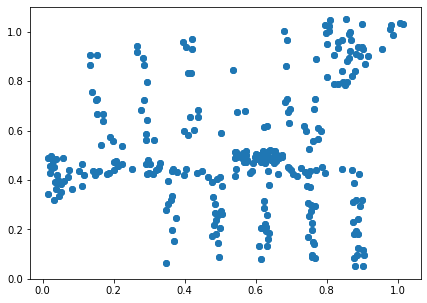

plot reconstruction distribution


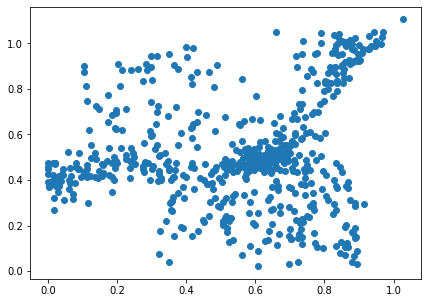

generate synthetic data


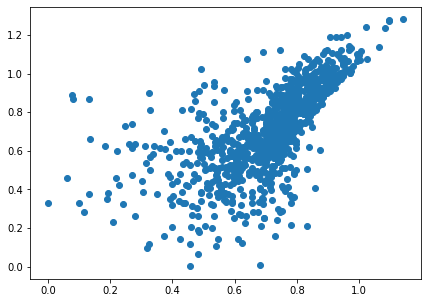

Epoch 2701
loss = 0.004213416948914528
Epoch 2702
loss = 0.004289473406970501
Epoch 2703
loss = 0.004248999059200287
Epoch 2704
loss = 0.004217569250613451
Epoch 2705
loss = 0.004209393635392189
Epoch 2706
loss = 0.004227317404001951
Epoch 2707
loss = 0.004242204129695892
Epoch 2708
loss = 0.004228387959301472
Epoch 2709
loss = 0.00424180505797267
Epoch 2710
loss = 0.004260824527591467
Epoch 2711
loss = 0.004251196049153805
Epoch 2712
loss = 0.0042227571830153465
Epoch 2713
loss = 0.004264614544808865
Epoch 2714
loss = 0.004220090340822935
Epoch 2715
loss = 0.004230139311403036
Epoch 2716
loss = 0.004237087443470955
Epoch 2717
loss = 0.004252210725098848
Epoch 2718
loss = 0.004202147014439106
Epoch 2719
loss = 0.004225071053951979
Epoch 2720
loss = 0.0042535183019936085
Epoch 2721
loss = 0.004233133979141712
Epoch 2722
loss = 0.004223702009767294
Epoch 2723
loss = 0.004259644076228142
Epoch 2724
loss = 0.00422778632491827
Epoch 2725
loss = 0.004230574704706669
Epoch 2726
loss = 0.00424

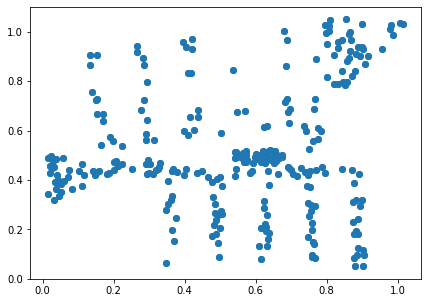

plot reconstruction distribution


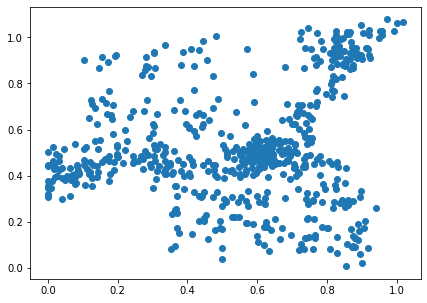

generate synthetic data


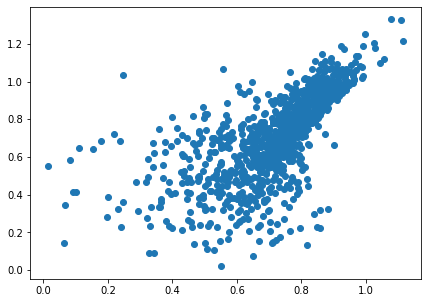

Epoch 2801
loss = 0.004195712506771088
Epoch 2802
loss = 0.004221731331199408
Epoch 2803
loss = 0.0042251949198544025
Epoch 2804
loss = 0.004196830093860626
Epoch 2805
loss = 0.004188907332718372
Epoch 2806
loss = 0.004226090852171183
Epoch 2807
loss = 0.004256487358361483
Epoch 2808
loss = 0.004237501882016659
Epoch 2809
loss = 0.004190168809145689
Epoch 2810
loss = 0.004261341877281666
Epoch 2811
loss = 0.004244633484631777
Epoch 2812
loss = 0.0042572845704853535
Epoch 2813
loss = 0.0042612068355083466
Epoch 2814
loss = 0.004256503190845251
Epoch 2815
loss = 0.004258366301655769
Epoch 2816
loss = 0.004248300567269325
Epoch 2817
loss = 0.004252540413290262
Epoch 2818
loss = 0.004233619663864374
Epoch 2819
loss = 0.004231532569974661
Epoch 2820
loss = 0.004220778588205576
Epoch 2821
loss = 0.0042004669085145
Epoch 2822
loss = 0.004240345675498247
Epoch 2823
loss = 0.00420810841023922
Epoch 2824
loss = 0.004201943054795265
Epoch 2825
loss = 0.004214878659695387
Epoch 2826
loss = 0.00422

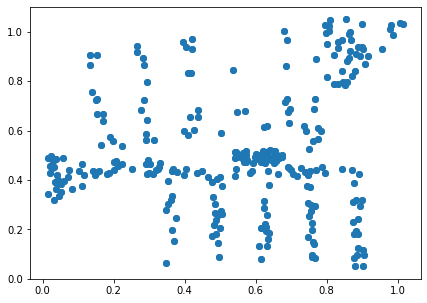

plot reconstruction distribution


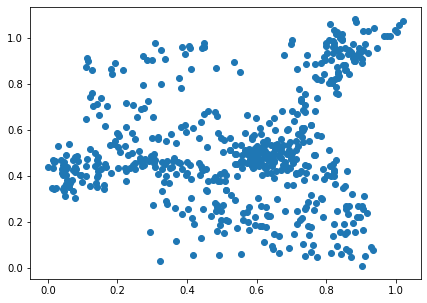

generate synthetic data


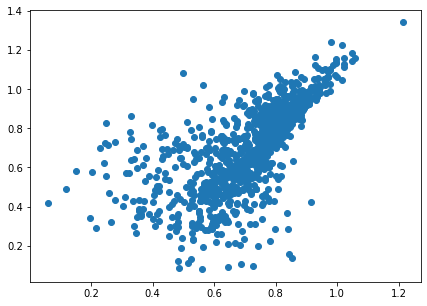

Epoch 2901
loss = 0.0042271800339221954
Epoch 2902
loss = 0.004223693627864122
Epoch 2903
loss = 0.004223903641104698
Epoch 2904
loss = 0.004202292766422033
Epoch 2905
loss = 0.004242025315761566
Epoch 2906
loss = 0.004211146850138903
Epoch 2907
loss = 0.004222457762807608
Epoch 2908
loss = 0.0042028408497571945
Epoch 2909
loss = 0.004244193434715271
Epoch 2910
loss = 0.004249440040439367
Epoch 2911
loss = 0.004225448239594698
Epoch 2912
loss = 0.004214166663587093
Epoch 2913
loss = 0.004232574254274368
Epoch 2914
loss = 0.004221531096845865
Epoch 2915
loss = 0.004225368611514568
Epoch 2916
loss = 0.004219662863761187
Epoch 2917
loss = 0.0042406064458191395
Epoch 2918
loss = 0.0042175413109362125
Epoch 2919
loss = 0.004234657157212496
Epoch 2920
loss = 0.004269538912922144
Epoch 2921
loss = 0.004219966474920511
Epoch 2922
loss = 0.0042451657354831696
Epoch 2923
loss = 0.004244219046086073
Epoch 2924
loss = 0.004195843823254108
Epoch 2925
loss = 0.004250247497111559
Epoch 2926
loss = 0.

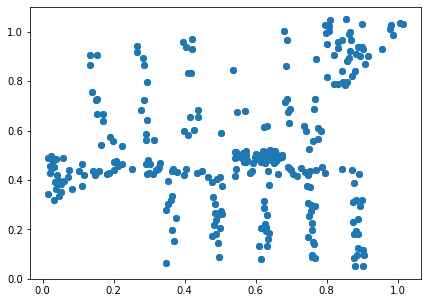

plot reconstruction distribution


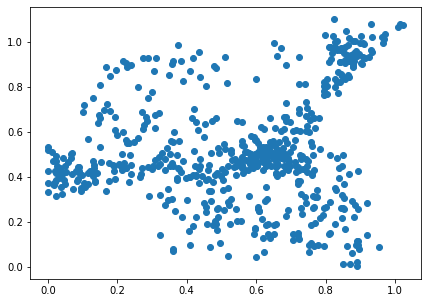

generate synthetic data


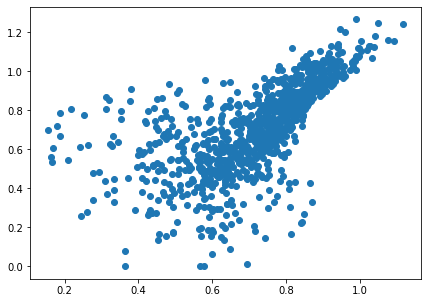

Epoch 3001
loss = 0.004213854670524597
Epoch 3002
loss = 0.004235716536641121
Epoch 3003
loss = 0.0042267595417797565
Epoch 3004
loss = 0.0042235394939780235
Epoch 3005
loss = 0.004220391623675823
Epoch 3006
loss = 0.004271557554602623
Epoch 3007
loss = 0.004238735884428024
Epoch 3008
loss = 0.0042276205494999886
Epoch 3009
loss = 0.004230113234370947
Epoch 3010
loss = 0.0042275600135326385
Epoch 3011
loss = 0.004259928595274687
Epoch 3012
loss = 0.004245220683515072
Epoch 3013
loss = 0.004221635404974222
Epoch 3014
loss = 0.004250060301274061
Epoch 3015
loss = 0.004202014766633511
Epoch 3016
loss = 0.004219722934067249
Epoch 3017
loss = 0.004210554528981447
Epoch 3018
loss = 0.00421541603282094
Epoch 3019
loss = 0.004179324023425579
Epoch 3020
loss = 0.004241304937750101
Epoch 3021
loss = 0.004221772775053978
Epoch 3022
loss = 0.0042181764729321
Epoch 3023
loss = 0.004239247180521488
Epoch 3024
loss = 0.0042406413704156876
Epoch 3025
loss = 0.0042337956838309765
Epoch 3026
loss = 0.00

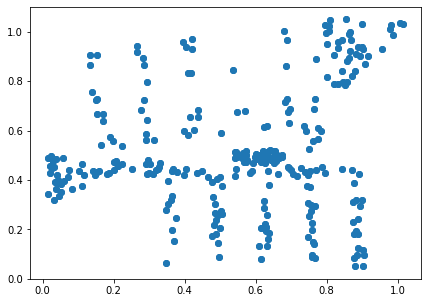

plot reconstruction distribution


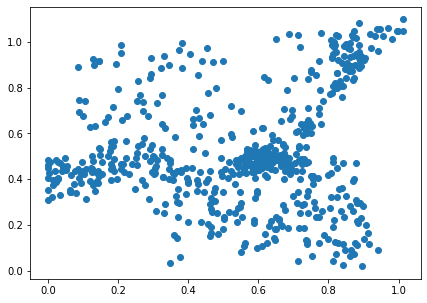

generate synthetic data


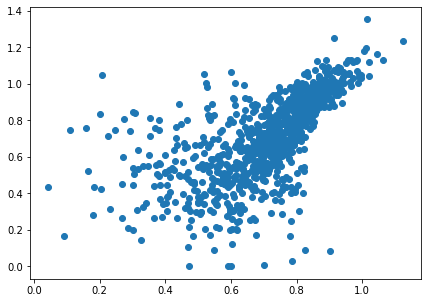

Epoch 3101
loss = 0.004248480312526226
Epoch 3102
loss = 0.004242674447596073
Epoch 3103
loss = 0.0042393445037305355
Epoch 3104
loss = 0.004214024171233177
Epoch 3105
loss = 0.004244942683726549
Epoch 3106
loss = 0.004203942138701677
Epoch 3107
loss = 0.004252623300999403
Epoch 3108
loss = 0.004214812535792589
Epoch 3109
loss = 0.004203937016427517
Epoch 3110
loss = 0.004227825906127691
Epoch 3111
loss = 0.0042056008242070675
Epoch 3112
loss = 0.004218756221234798
Epoch 3113
loss = 0.004276820924133062
Epoch 3114
loss = 0.004220270086079836
Epoch 3115
loss = 0.004224250093102455
Epoch 3116
loss = 0.004238744731992483
Epoch 3117
loss = 0.0042190635576844215
Epoch 3118
loss = 0.00421008700504899
Epoch 3119
loss = 0.00421011820435524
Epoch 3120
loss = 0.0042048064060509205
Epoch 3121
loss = 0.004206805489957333
Epoch 3122
loss = 0.004230493679642677
Epoch 3123
loss = 0.004186881240457296
Epoch 3124
loss = 0.004223950672894716
Epoch 3125
loss = 0.004273943603038788
Epoch 3126
loss = 0.004

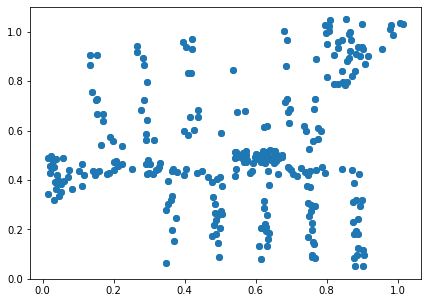

plot reconstruction distribution


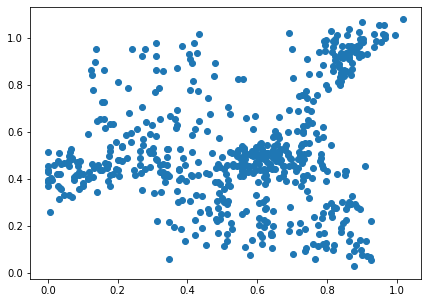

generate synthetic data


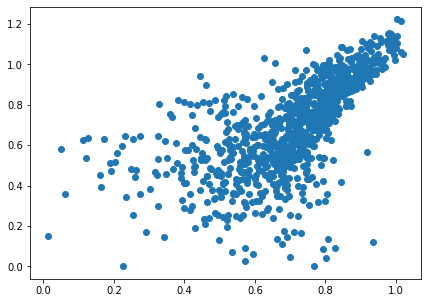

Epoch 3201
loss = 0.004271927289664745
Epoch 3202
loss = 0.004274339880794287
Epoch 3203
loss = 0.004242102615535259
Epoch 3204
loss = 0.004213178064674139
Epoch 3205
loss = 0.004237164277583361
Epoch 3206
loss = 0.004217755515128374
Epoch 3207
loss = 0.004235299304127693
Epoch 3208
loss = 0.0042071095667779446
Epoch 3209
loss = 0.004218154586851597
Epoch 3210
loss = 0.004248820710927248
Epoch 3211
loss = 0.004227905068546534
Epoch 3212
loss = 0.0042399149388074875
Epoch 3213
loss = 0.004227576311677694
Epoch 3214
loss = 0.004244833718985319
Epoch 3215
loss = 0.0042028846219182014
Epoch 3216
loss = 0.004227975849062204
Epoch 3217
loss = 0.0042254067957401276
Epoch 3218
loss = 0.00421301880851388
Epoch 3219
loss = 0.004193565808236599
Epoch 3220
loss = 0.004266277886927128
Epoch 3221
loss = 0.0042782374657690525
Epoch 3222
loss = 0.004210250917822123
Epoch 3223
loss = 0.0042433785274624825
Epoch 3224
loss = 0.00420259777456522
Epoch 3225
loss = 0.004203211981803179
Epoch 3226
loss = 0.0

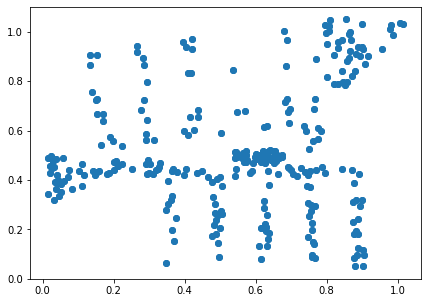

plot reconstruction distribution


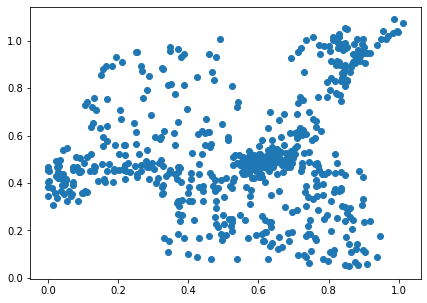

generate synthetic data


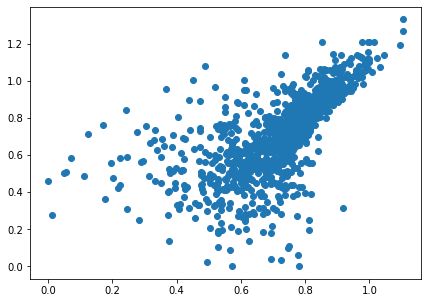

Epoch 3301
loss = 0.004192682448774576
Epoch 3302
loss = 0.004231046885251999
Epoch 3303
loss = 0.004217772278934717
Epoch 3304
loss = 0.004238158464431763
Epoch 3305
loss = 0.0042036124505102634
Epoch 3306
loss = 0.004213536158204079
Epoch 3307
loss = 0.004223528318107128
Epoch 3308
loss = 0.004256252199411392
Epoch 3309
loss = 0.004238724708557129
Epoch 3310
loss = 0.0041978382505476475
Epoch 3311
loss = 0.004225408658385277
Epoch 3312
loss = 0.004202977288514376
Epoch 3313
loss = 0.004238447640091181
Epoch 3314
loss = 0.004188676830381155
Epoch 3315
loss = 0.004193178843706846
Epoch 3316
loss = 0.004207293037325144
Epoch 3317
loss = 0.0042223394848406315
Epoch 3318
loss = 0.004177977796643972
Epoch 3319
loss = 0.004208373837172985
Epoch 3320
loss = 0.004222004674375057
Epoch 3321
loss = 0.004244164563715458
Epoch 3322
loss = 0.004232584033161402
Epoch 3323
loss = 0.0042348625138401985
Epoch 3324
loss = 0.0042545972391963005
Epoch 3325
loss = 0.004219831898808479
Epoch 3326
loss = 0.

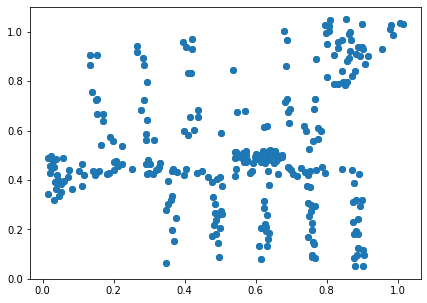

plot reconstruction distribution


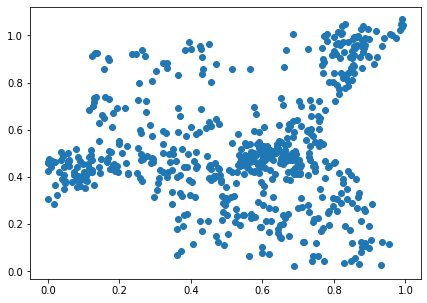

generate synthetic data


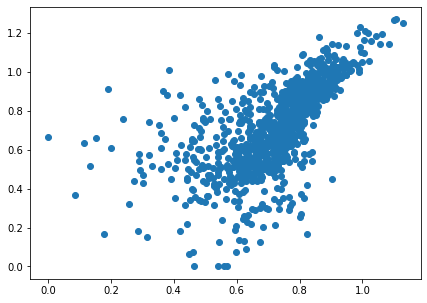

Epoch 3401
loss = 0.004237421788275242
Epoch 3402
loss = 0.004203558899462223
Epoch 3403
loss = 0.004181749653071165
Epoch 3404
loss = 0.004226124379783869
Epoch 3405
loss = 0.00422518840059638
Epoch 3406
loss = 0.004208361264318228
Epoch 3407
loss = 0.004208756145089865
Epoch 3408
loss = 0.004202779848128557
Epoch 3409
loss = 0.004216709174215794
Epoch 3410
loss = 0.004235029686242342
Epoch 3411
loss = 0.00419952068477869
Epoch 3412
loss = 0.004201199393719435
Epoch 3413
loss = 0.004219997674226761
Epoch 3414
loss = 0.004242716357111931
Epoch 3415
loss = 0.004212230909615755
Epoch 3416
loss = 0.004195726476609707
Epoch 3417
loss = 0.004195161163806915
Epoch 3418
loss = 0.00417874613776803
Epoch 3419
loss = 0.004239977337419987
Epoch 3420
loss = 0.004233611281961203
Epoch 3421
loss = 0.004185966681689024
Epoch 3422
loss = 0.004174670670181513
Epoch 3423
loss = 0.004189798142760992
Epoch 3424
loss = 0.004204781726002693
Epoch 3425
loss = 0.004180841613560915
Epoch 3426
loss = 0.00419796

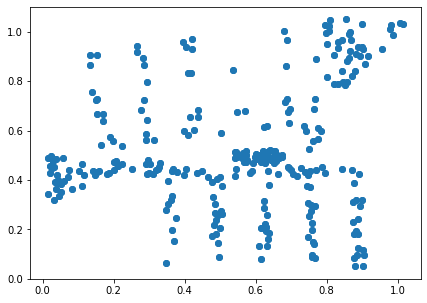

plot reconstruction distribution


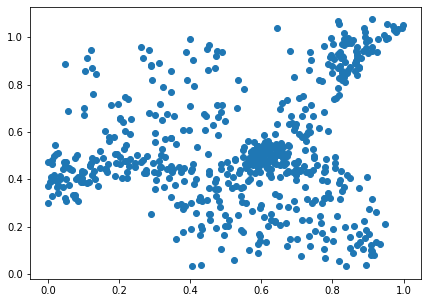

generate synthetic data


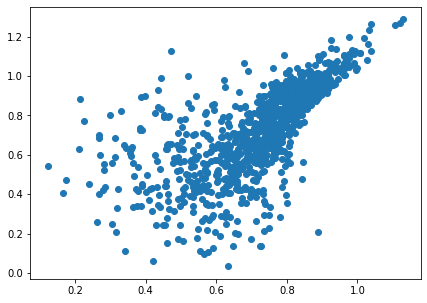

Epoch 3501
loss = 0.004204653203487396
Epoch 3502
loss = 0.004175161011517048
Epoch 3503
loss = 0.004215969238430262
Epoch 3504
loss = 0.0042387694120407104
Epoch 3505
loss = 0.004211255814880133
Epoch 3506
loss = 0.00422999681904912
Epoch 3507
loss = 0.004184890538454056
Epoch 3508
loss = 0.004230186343193054
Epoch 3509
loss = 0.004221496172249317
Epoch 3510
loss = 0.004220693372189999
Epoch 3511
loss = 0.004206348210573196
Epoch 3512
loss = 0.0042183976620435715
Epoch 3513
loss = 0.004207297693938017
Epoch 3514
loss = 0.004250351805239916
Epoch 3515
loss = 0.004214159678667784
Epoch 3516
loss = 0.0042089056223630905
Epoch 3517
loss = 0.004221371840685606
Epoch 3518
loss = 0.004194421693682671
Epoch 3519
loss = 0.004195051267743111
Epoch 3520
loss = 0.004227855708450079
Epoch 3521
loss = 0.004196112509816885
Epoch 3522
loss = 0.0042110043577849865
Epoch 3523
loss = 0.0041948542930185795
Epoch 3524
loss = 0.004212576430290937
Epoch 3525
loss = 0.004174434579908848
Epoch 3526
loss = 0.0

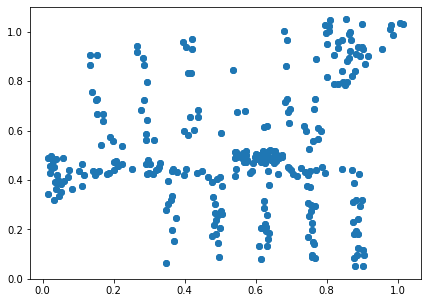

plot reconstruction distribution


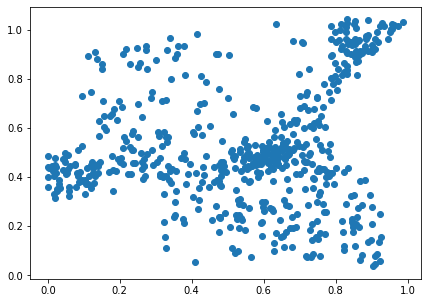

generate synthetic data


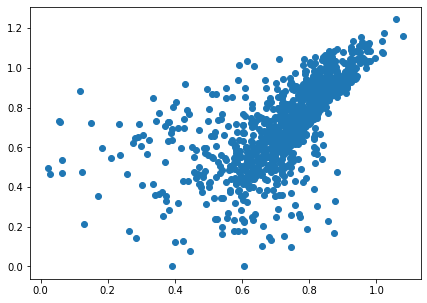

Epoch 3601
loss = 0.004188483580946922
Epoch 3602
loss = 0.004198180045932531
Epoch 3603
loss = 0.004227118566632271
Epoch 3604
loss = 0.004220729693770409
Epoch 3605
loss = 0.004186377860605717
Epoch 3606
loss = 0.004221152048557997
Epoch 3607
loss = 0.004194208420813084
Epoch 3608
loss = 0.0042261541821062565
Epoch 3609
loss = 0.004179962445050478
Epoch 3610
loss = 0.004204289522022009
Epoch 3611
loss = 0.00422152504324913
Epoch 3612
loss = 0.004176191985607147
Epoch 3613
loss = 0.004239055793732405
Epoch 3614
loss = 0.004204730037599802
Epoch 3615
loss = 0.004225815646350384
Epoch 3616
loss = 0.004220064729452133
Epoch 3617
loss = 0.004240357782691717
Epoch 3618
loss = 0.004180009942501783
Epoch 3619
loss = 0.004205701407045126
Epoch 3620
loss = 0.004199168644845486
Epoch 3621
loss = 0.004219247028231621
Epoch 3622
loss = 0.00419067544862628
Epoch 3623
loss = 0.004188024438917637
Epoch 3624
loss = 0.0042310417629778385
Epoch 3625
loss = 0.0042220670729875565
Epoch 3626
loss = 0.0042

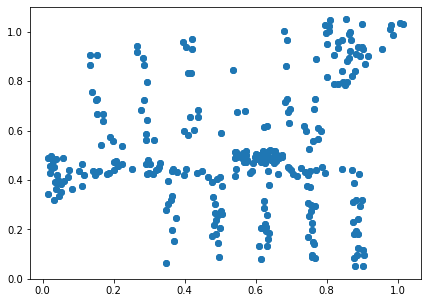

plot reconstruction distribution


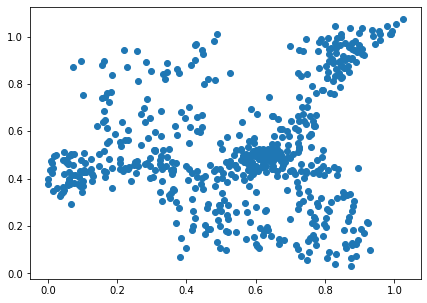

generate synthetic data


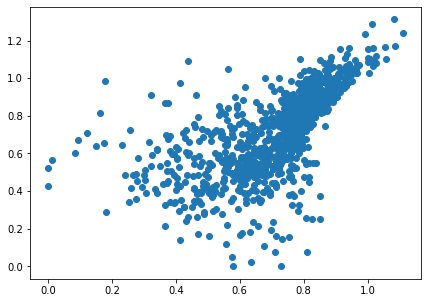

Epoch 3701
loss = 0.004177923779934645
Epoch 3702
loss = 0.00418520113453269
Epoch 3703
loss = 0.004181609023362398
Epoch 3704
loss = 0.00424302788451314
Epoch 3705
loss = 0.004184157121926546
Epoch 3706
loss = 0.004209981299936771
Epoch 3707
loss = 0.00426507880911231
Epoch 3708
loss = 0.004239784553647041
Epoch 3709
loss = 0.004204189870506525
Epoch 3710
loss = 0.004207349848002195
Epoch 3711
loss = 0.004241985734552145
Epoch 3712
loss = 0.004198088310658932
Epoch 3713
loss = 0.004220126662403345
Epoch 3714
loss = 0.004185662139207125
Epoch 3715
loss = 0.004191684536635876
Epoch 3716
loss = 0.0042038653045892715
Epoch 3717
loss = 0.004194426815956831
Epoch 3718
loss = 0.004194310400635004
Epoch 3719
loss = 0.00421252241358161
Epoch 3720
loss = 0.00420893169939518
Epoch 3721
loss = 0.004199880175292492
Epoch 3722
loss = 0.0042045642621815205
Epoch 3723
loss = 0.004241335671395063
Epoch 3724
loss = 0.004277774132788181
Epoch 3725
loss = 0.004203057382255793
Epoch 3726
loss = 0.00419488

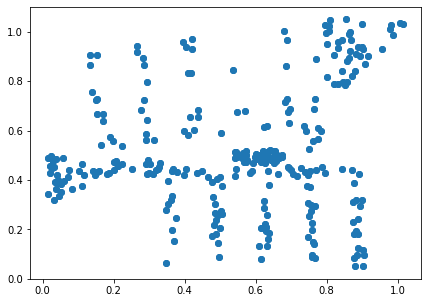

plot reconstruction distribution


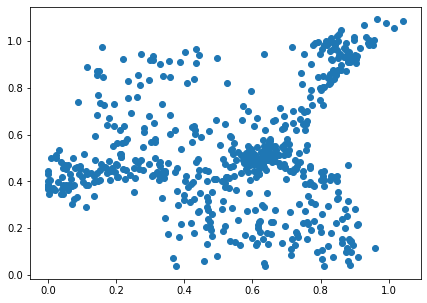

generate synthetic data


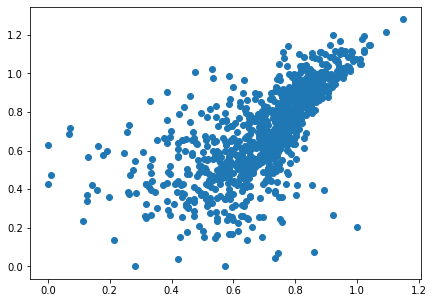

Epoch 3801
loss = 0.004208302590996027
Epoch 3802
loss = 0.004203750751912594
Epoch 3803
loss = 0.004215269815176725
Epoch 3804
loss = 0.00418922770768404
Epoch 3805
loss = 0.0042281742207705975
Epoch 3806
loss = 0.00417255749925971
Epoch 3807
loss = 0.0042235092259943485
Epoch 3808
loss = 0.004191760439425707
Epoch 3809
loss = 0.004205264616757631
Epoch 3810
loss = 0.004185045138001442
Epoch 3811
loss = 0.004196885507553816
Epoch 3812
loss = 0.004180292598903179
Epoch 3813
loss = 0.0041952915489673615
Epoch 3814
loss = 0.004194181878119707
Epoch 3815
loss = 0.00422347616404295
Epoch 3816
loss = 0.0042090872302651405
Epoch 3817
loss = 0.0041961586102843285
Epoch 3818
loss = 0.004195059649646282
Epoch 3819
loss = 0.004217320587486029
Epoch 3820
loss = 0.004187367856502533
Epoch 3821
loss = 0.004198259208351374
Epoch 3822
loss = 0.004203556105494499
Epoch 3823
loss = 0.004213658627122641
Epoch 3824
loss = 0.0041465479880571365
Epoch 3825
loss = 0.004188008606433868
Epoch 3826
loss = 0.00

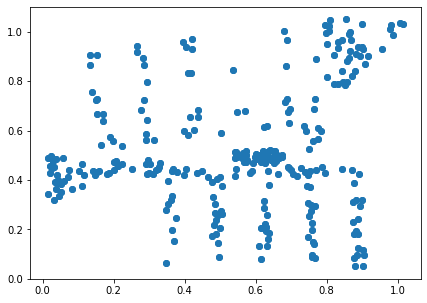

plot reconstruction distribution


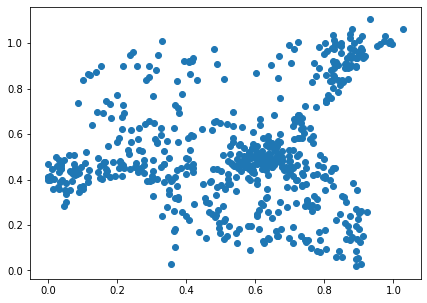

generate synthetic data


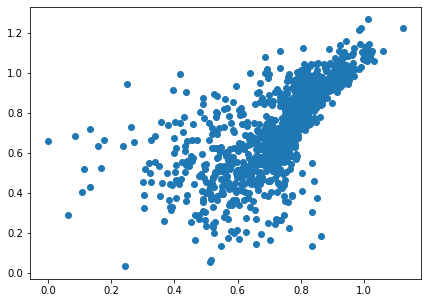

Epoch 3901
loss = 0.004211326129734516
Epoch 3902
loss = 0.004190465901046991
Epoch 3903
loss = 0.004227053839713335
Epoch 3904
loss = 0.004203233402222395
Epoch 3905
loss = 0.0042027439922094345
Epoch 3906
loss = 0.004199675749987364
Epoch 3907
loss = 0.00418029585853219
Epoch 3908
loss = 0.004223903175443411
Epoch 3909
loss = 0.004225919954478741
Epoch 3910
loss = 0.004200883209705353
Epoch 3911
loss = 0.004178911913186312
Epoch 3912
loss = 0.004196823108941317
Epoch 3913
loss = 0.004211163613945246
Epoch 3914
loss = 0.0041948421858251095
Epoch 3915
loss = 0.004203809890896082
Epoch 3916
loss = 0.004227065481245518
Epoch 3917
loss = 0.004185967613011599
Epoch 3918
loss = 0.004201995208859444
Epoch 3919
loss = 0.004211039282381535
Epoch 3920
loss = 0.004212324973195791
Epoch 3921
loss = 0.004205496050417423
Epoch 3922
loss = 0.004185463767498732
Epoch 3923
loss = 0.00419878913089633
Epoch 3924
loss = 0.004211725201457739
Epoch 3925
loss = 0.004197181202471256
Epoch 3926
loss = 0.00421

In [235]:
for epoch in range(max_epochs):
    print("Epoch {0}".format(epoch))
    for batch in train_loader:
        x = batch
        opt.zero_grad()
        reconstruction, mu, sigma = vae.forward_elbo(x)
        loss = -vae.loss_function(x, reconstruction, mu, sigma).mean(-1)
        loss_epoch += loss
        loss = loss/x.shape[0]
        loss.backward()
        opt.step()
        
    loss_epoch = loss_epoch / 3000
    print("loss = {0}".format(loss_epoch.item()))
    loss_train.append(loss_epoch)
    loss_epoch = 0
    for batch_test in test_loader:
         x_test = batch_test
         with torch.no_grad():
            reconstruction_test, mu_test, sigma_test = vae.forward_elbo(x_test)
            loss = (1/600) *(-vae.loss_function(x_test, reconstruction_test, mu_test, sigma_test).mean(-1))
            loss_test.append(loss)
         if epoch % 100 == 0:
           print("original distribution")
           plot_fire_evac_dataset(x_test)
           print("plot reconstruction distribution")
           plot_fire_evac_dataset(reconstruction_test)
           print("generate synthetic data")
           gen_data = vae.gen_sample_data(gendata_size, latent_dim)
           plot_fire_evac_tensor_dataset(gen_data)

Text(0.5, 1.0, 'epoch vs training elbo')

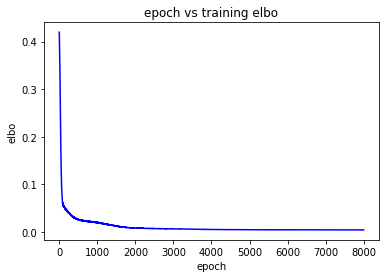

In [230]:
plt.plot(np.array(loss_train), 'b')
plt.xlabel("epoch")
plt.ylabel("elbo")
plt.title("epoch vs training elbo")

Text(0.5, 1.0, 'epoch vs testing elbo')

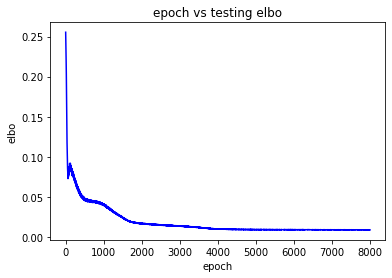

In [231]:
plt.plot(np.array(loss_test), 'b')
plt.xlabel("epoch")
plt.ylabel("elbo")
plt.title("epoch vs testing elbo")

In [233]:
torch.save(vae.state_dict(),"./train.checkpoint")